In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [2]:
# Define the segment colors and hue order with RGB values
segment_colors = {
    'Gold': (255, 215, 0),  # RGB for gold: Dark Yellow
    'Silver': (192, 192, 192),  # RGB for silver: Silver
    'Bronze': (139, 69, 19)  # RGB for bronze: Saddle Brown
}

# Convert the RGB values to matplotlib-compatible format (values between 0 and 1)
segment_colors = {key: (r / 255, g / 255, b / 255) for key, (r, g, b) in segment_colors.items()}
hue_order = ['Gold', 'Silver', 'Bronze']


In [3]:
df = pd.read_excel(r"E:\self learning\DA\PJ\MKT - RFM\Data-sau-khi-cluster-final-please.xlsx", sheet_name = 'File tổng hợp')
df.head()

,ID,Year Birth,Education,Marital Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,Store Purchases,Frequency,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total_accepted_campaign,Response,Segment
0,0,1985,Graduation,Married,70951,0,0,66,239,10,...,9,16,0,0,0,0,0,0,0,Silver
1,1,1961,Graduation,Single,57091,0,0,0,464,5,...,7,17,0,1,0,0,0,1,1,Silver
2,9,1975,Master,Single,46098,1,1,86,57,0,...,2,7,0,0,0,0,0,0,0,Bronze
3,13,1947,PhD,Widow,25358,0,1,57,19,0,...,3,4,0,0,0,0,0,0,0,Bronze
4,17,1971,PhD,Married,60491,0,1,81,637,47,...,7,24,0,0,0,0,0,0,0,Silver


In [4]:
mapping_marital = {
    'Absurd' : 0,
    'Alone' : 0,
    'Divorced' : 0,
    'Single' : 0,
    'Widow' : 0,
    'YOLO' : 0,
    'Together' : 1,
    'Married' : 1
}
df['Marital Status'] = df['Marital Status'].map(mapping_marital)
df['Marital Status'].value_counts()


Marital Status
1    1419
0     780
Name: count, dtype: int64

In [5]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}
df['Education'] = df['Education'].map(mapping_education)
df

,ID,Year Birth,Education,Marital Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,Store Purchases,Frequency,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total_accepted_campaign,Response,Segment
0,0,1985,1,1,70951,0,0,66,239,10,...,9,16,0,0,0,0,0,0,0,Silver
1,1,1961,1,0,57091,0,0,0,464,5,...,7,17,0,1,0,0,0,1,1,Silver
2,9,1975,2,0,46098,1,1,86,57,0,...,2,7,0,0,0,0,0,0,0,Bronze
3,13,1947,3,0,25358,0,1,57,19,0,...,3,4,0,0,0,0,0,0,0,Bronze
4,17,1971,3,1,60491,0,1,81,637,47,...,7,24,0,0,0,0,0,0,0,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,11176,1970,3,1,65968,0,1,12,376,9,...,7,16,0,0,0,0,0,0,0,Bronze
2195,11178,1972,2,0,42394,1,0,69,15,2,...,3,4,0,0,0,0,0,0,0,Bronze
2196,11187,1978,0,0,26487,1,0,23,2,8,...,3,6,0,0,0,0,0,0,0,Bronze
2197,11188,1957,1,1,26091,1,1,84,15,10,...,3,6,0,0,0,0,0,0,0,Bronze


In [6]:
df['total_dependents'] = df['Marital Status'] + df['Kidhome'] + df['Teenhome']
df.sample(5)

,ID,Year Birth,Education,Marital Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,...,Frequency,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Total_accepted_campaign,Response,Segment,total_dependents
894,4483,1993,1,0,72354,0,0,67,315,26,...,18,0,0,0,0,0,0,0,Silver,0
1087,5389,1964,1,1,48920,0,2,93,238,17,...,13,0,0,0,1,0,1,0,Bronze,3
2086,10669,1981,1,1,54386,0,1,8,277,21,...,15,0,0,0,0,0,0,0,Bronze,2
1521,7629,1977,1,1,22108,1,1,46,5,3,...,5,0,0,0,0,0,0,0,Bronze,3
774,3924,1965,3,0,57912,0,1,34,801,0,...,23,0,0,0,1,0,1,0,Silver,1


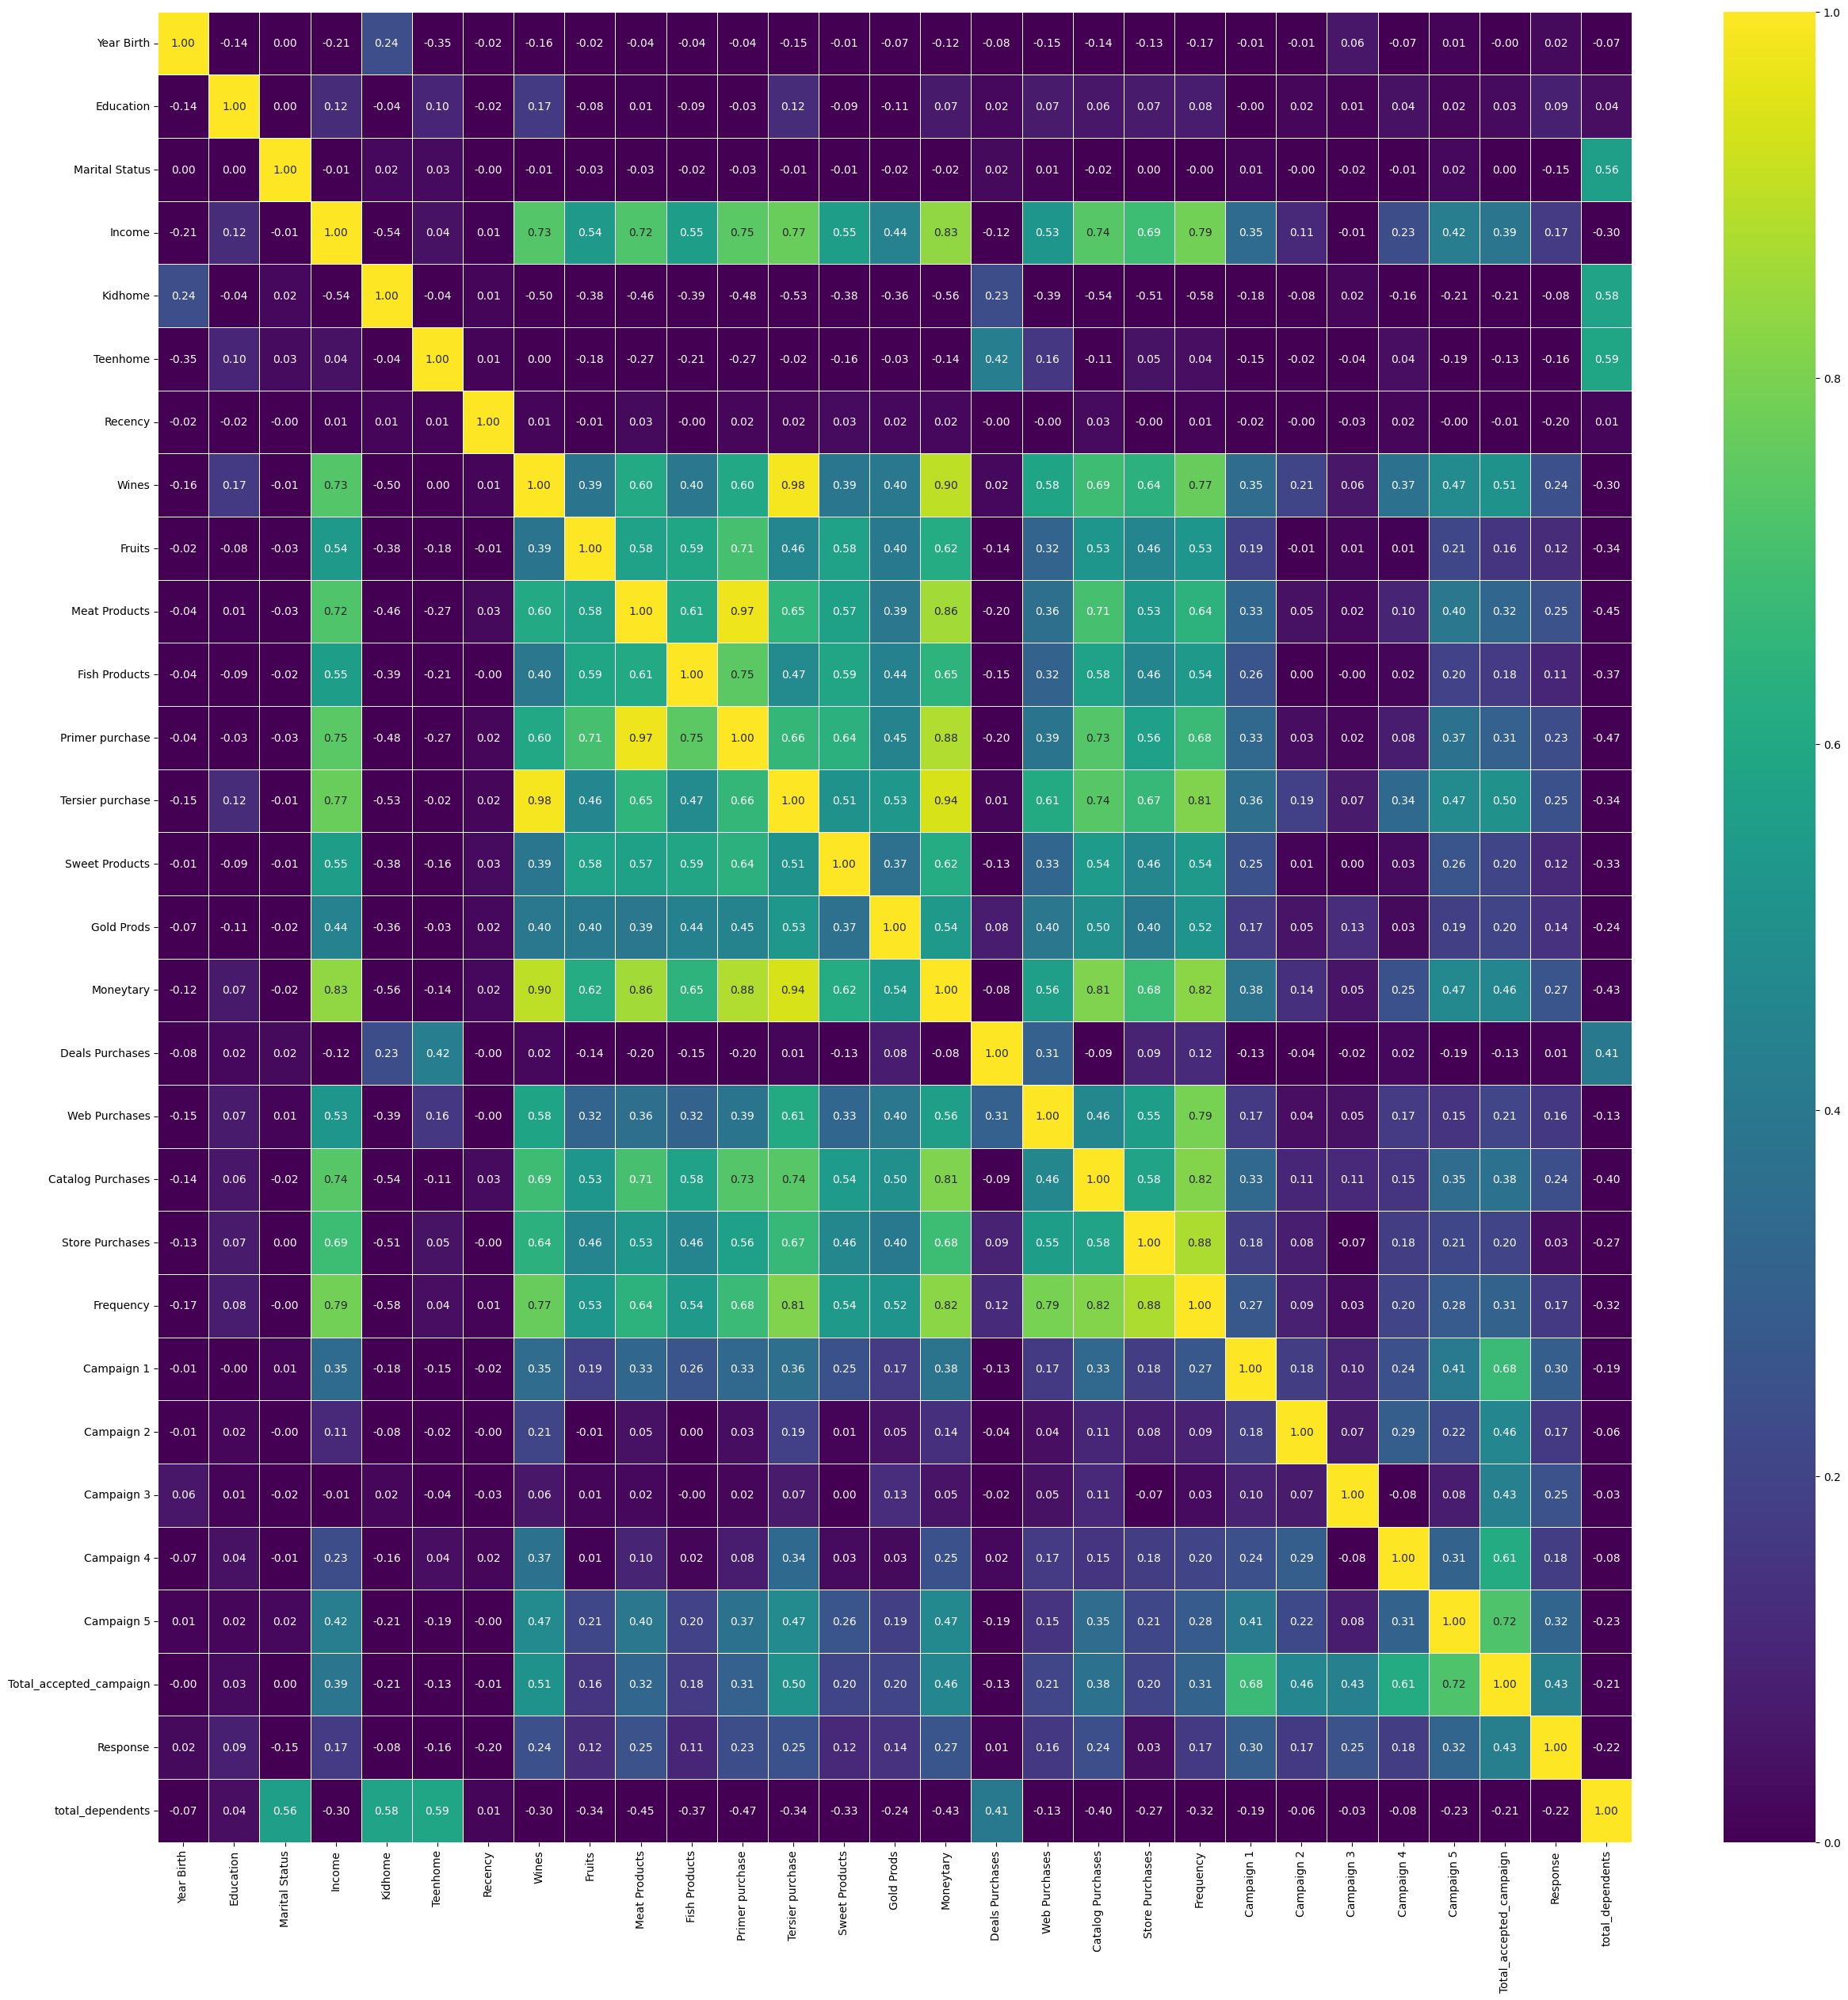

In [8]:
#heatmap
plt.figure(figsize=(30, 30)) 
sns.heatmap(df.drop(['ID','Segment',], axis=1).corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show()

In [9]:
X = df.drop(['ID','Wines','Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Prods',
                      'Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'], axis=1)


In [10]:
X['Response'].value_counts(normalize = True)

Response
0    0.848568
1    0.151432
Name: proportion, dtype: float64

In [11]:
X.describe()

,Year Birth,Education,Marital Status,Income,Kidhome,Teenhome,Recency,Primer purchase,Tersier purchase,Moneytary,Deals Purchases,Web Purchases,Catalog Purchases,Store Purchases,Frequency,Total_accepted_campaign,Response,total_dependents
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,1968.800819,1.662119,0.645293,51747.007731,0.442474,0.506139,49.043201,229.431105,377.913142,607.344247,2.291951,4.076398,2.639382,5.838108,12.553888,0.300591,0.151432,1.593906
std,11.990153,0.839200,0.478533,20541.490723,0.537270,0.543665,28.921900,279.144245,380.292596,602.322035,1.786942,2.621841,2.747240,3.230201,7.148985,0.681321,0.358551,0.904030
min,1893.000000,0.000000,0.000000,3502.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,1.000000,0.000000,35402.000000,0.000000,0.000000,24.000000,25.000000,41.500000,69.000000,1.000000,2.000000,0.000000,3.000000,6.000000,0.000000,0.000000,1.000000
50%,1970.000000,1.000000,1.000000,51369.000000,0.000000,0.000000,49.000000,91.000000,248.000000,397.000000,2.000000,4.000000,2.000000,5.000000,12.000000,0.000000,0.000000,2.000000
75%,1977.000000,2.000000,1.000000,68334.000000,1.000000,1.000000,74.000000,358.500000,618.000000,1047.500000,3.000000,6.000000,4.000000,8.000000,18.000000,0.000000,0.000000,2.000000
max,1996.000000,3.000000,1.000000,105471.000000,2.000000,2.000000,99.000000,1306.000000,1689.000000,2525.000000,13.000000,11.000000,11.000000,13.000000,32.000000,4.000000,1.000000,4.000000


In [12]:
X.groupby('Segment')['Marital Status'].describe()

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
Bronze,1244.0,0.654341,0.475774,0.0,0.0,1.0,1.0,1.0
Gold,356.0,0.620787,0.485874,0.0,0.0,1.0,1.0,1.0
Silver,599.0,0.641068,0.480088,0.0,0.0,1.0,1.0,1.0


Co the thay la distribution cua frequency va total spent kha la highly skewed nen la minh se segment de chinh xac hon 

# EDA

## Univerate Analysis

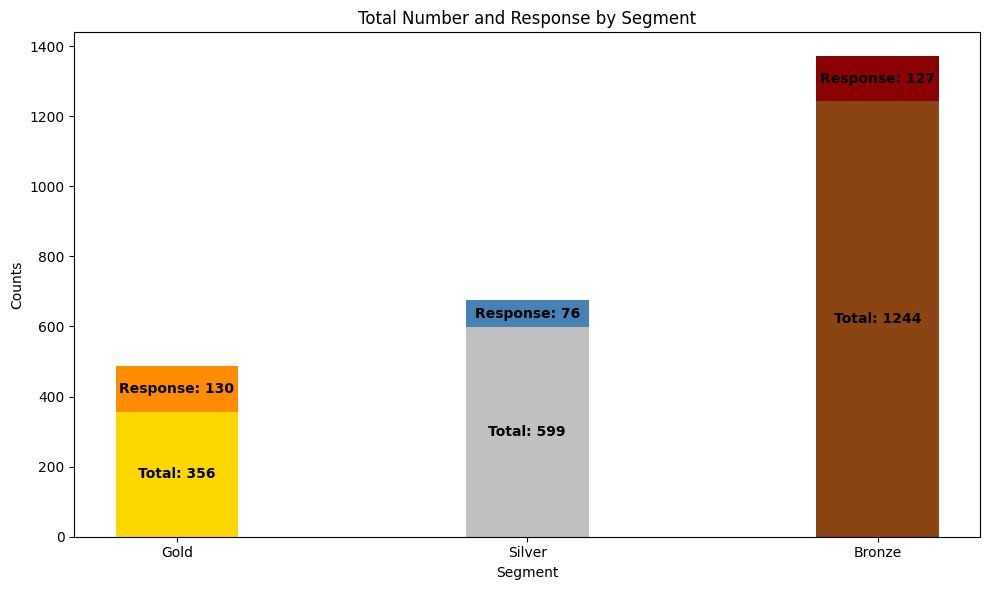

In [13]:
# Define segment order and colors
segment_order = ['Gold', 'Silver', 'Bronze']
segment_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'saddlebrown'}
response_colors = {'Gold': 'darkorange', 'Silver': 'steelblue', 'Bronze': 'darkred'}

# Calculate response distribution for each segment
response_distribution = df.groupby(['Segment', 'Response']).size().unstack()
segment_counts = df['Segment'].value_counts()

# Calculate response ratios
response_ratios = response_distribution.div(segment_counts, axis=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
width = 0.35  # Width of the bars

for i, segment in enumerate(segment_order):
    # Plot total number
    total_numbers = segment_counts[segment]
    plt.bar(i, total_numbers, width, color=segment_colors[segment], label=f'{segment} - Total')
    
    # Plot total response
    total_responses = response_distribution.loc[segment, 1] if 1 in response_distribution.loc[segment] else 0
    plt.bar(i, total_responses, width, color=response_colors[segment], label=f'{segment} - Response', bottom=total_numbers)

    # Annotate the bars with values
    plt.text(i, total_numbers / 2, f'Total: {total_numbers}', ha='center', va='center', color='black', fontweight='bold', fontsize=10)
    plt.text(i, total_numbers + total_responses / 2, f'Response: {total_responses}', ha='center', va='center', color='black', fontweight='bold', fontsize=10)
    
plt.xlabel('Segment')
plt.ylabel('Counts')
plt.title('Total Number and Response by Segment')
plt.xticks(range(len(segment_order)), segment_order)
plt.tight_layout()
plt.show()


In [14]:
# Define the numerical and categorical variables to visualize
numerical_vars = ['Year Birth', 'Income', 'Recency', 'Moneytary','Tersier purchase', 'Primer purchase',
                         'Store Purchases', 'Catalog Purchases', 'Web Purchases', 'Deals Purchases', 'Frequency']

categorical_vars = ['Education', 'Marital Status','Total_accepted_campaign','total_dependents']

In [15]:
buying_channel_vars = ['Store Purchases', 'Catalog Purchases', 'Web Purchases']

### Categorical Analysis

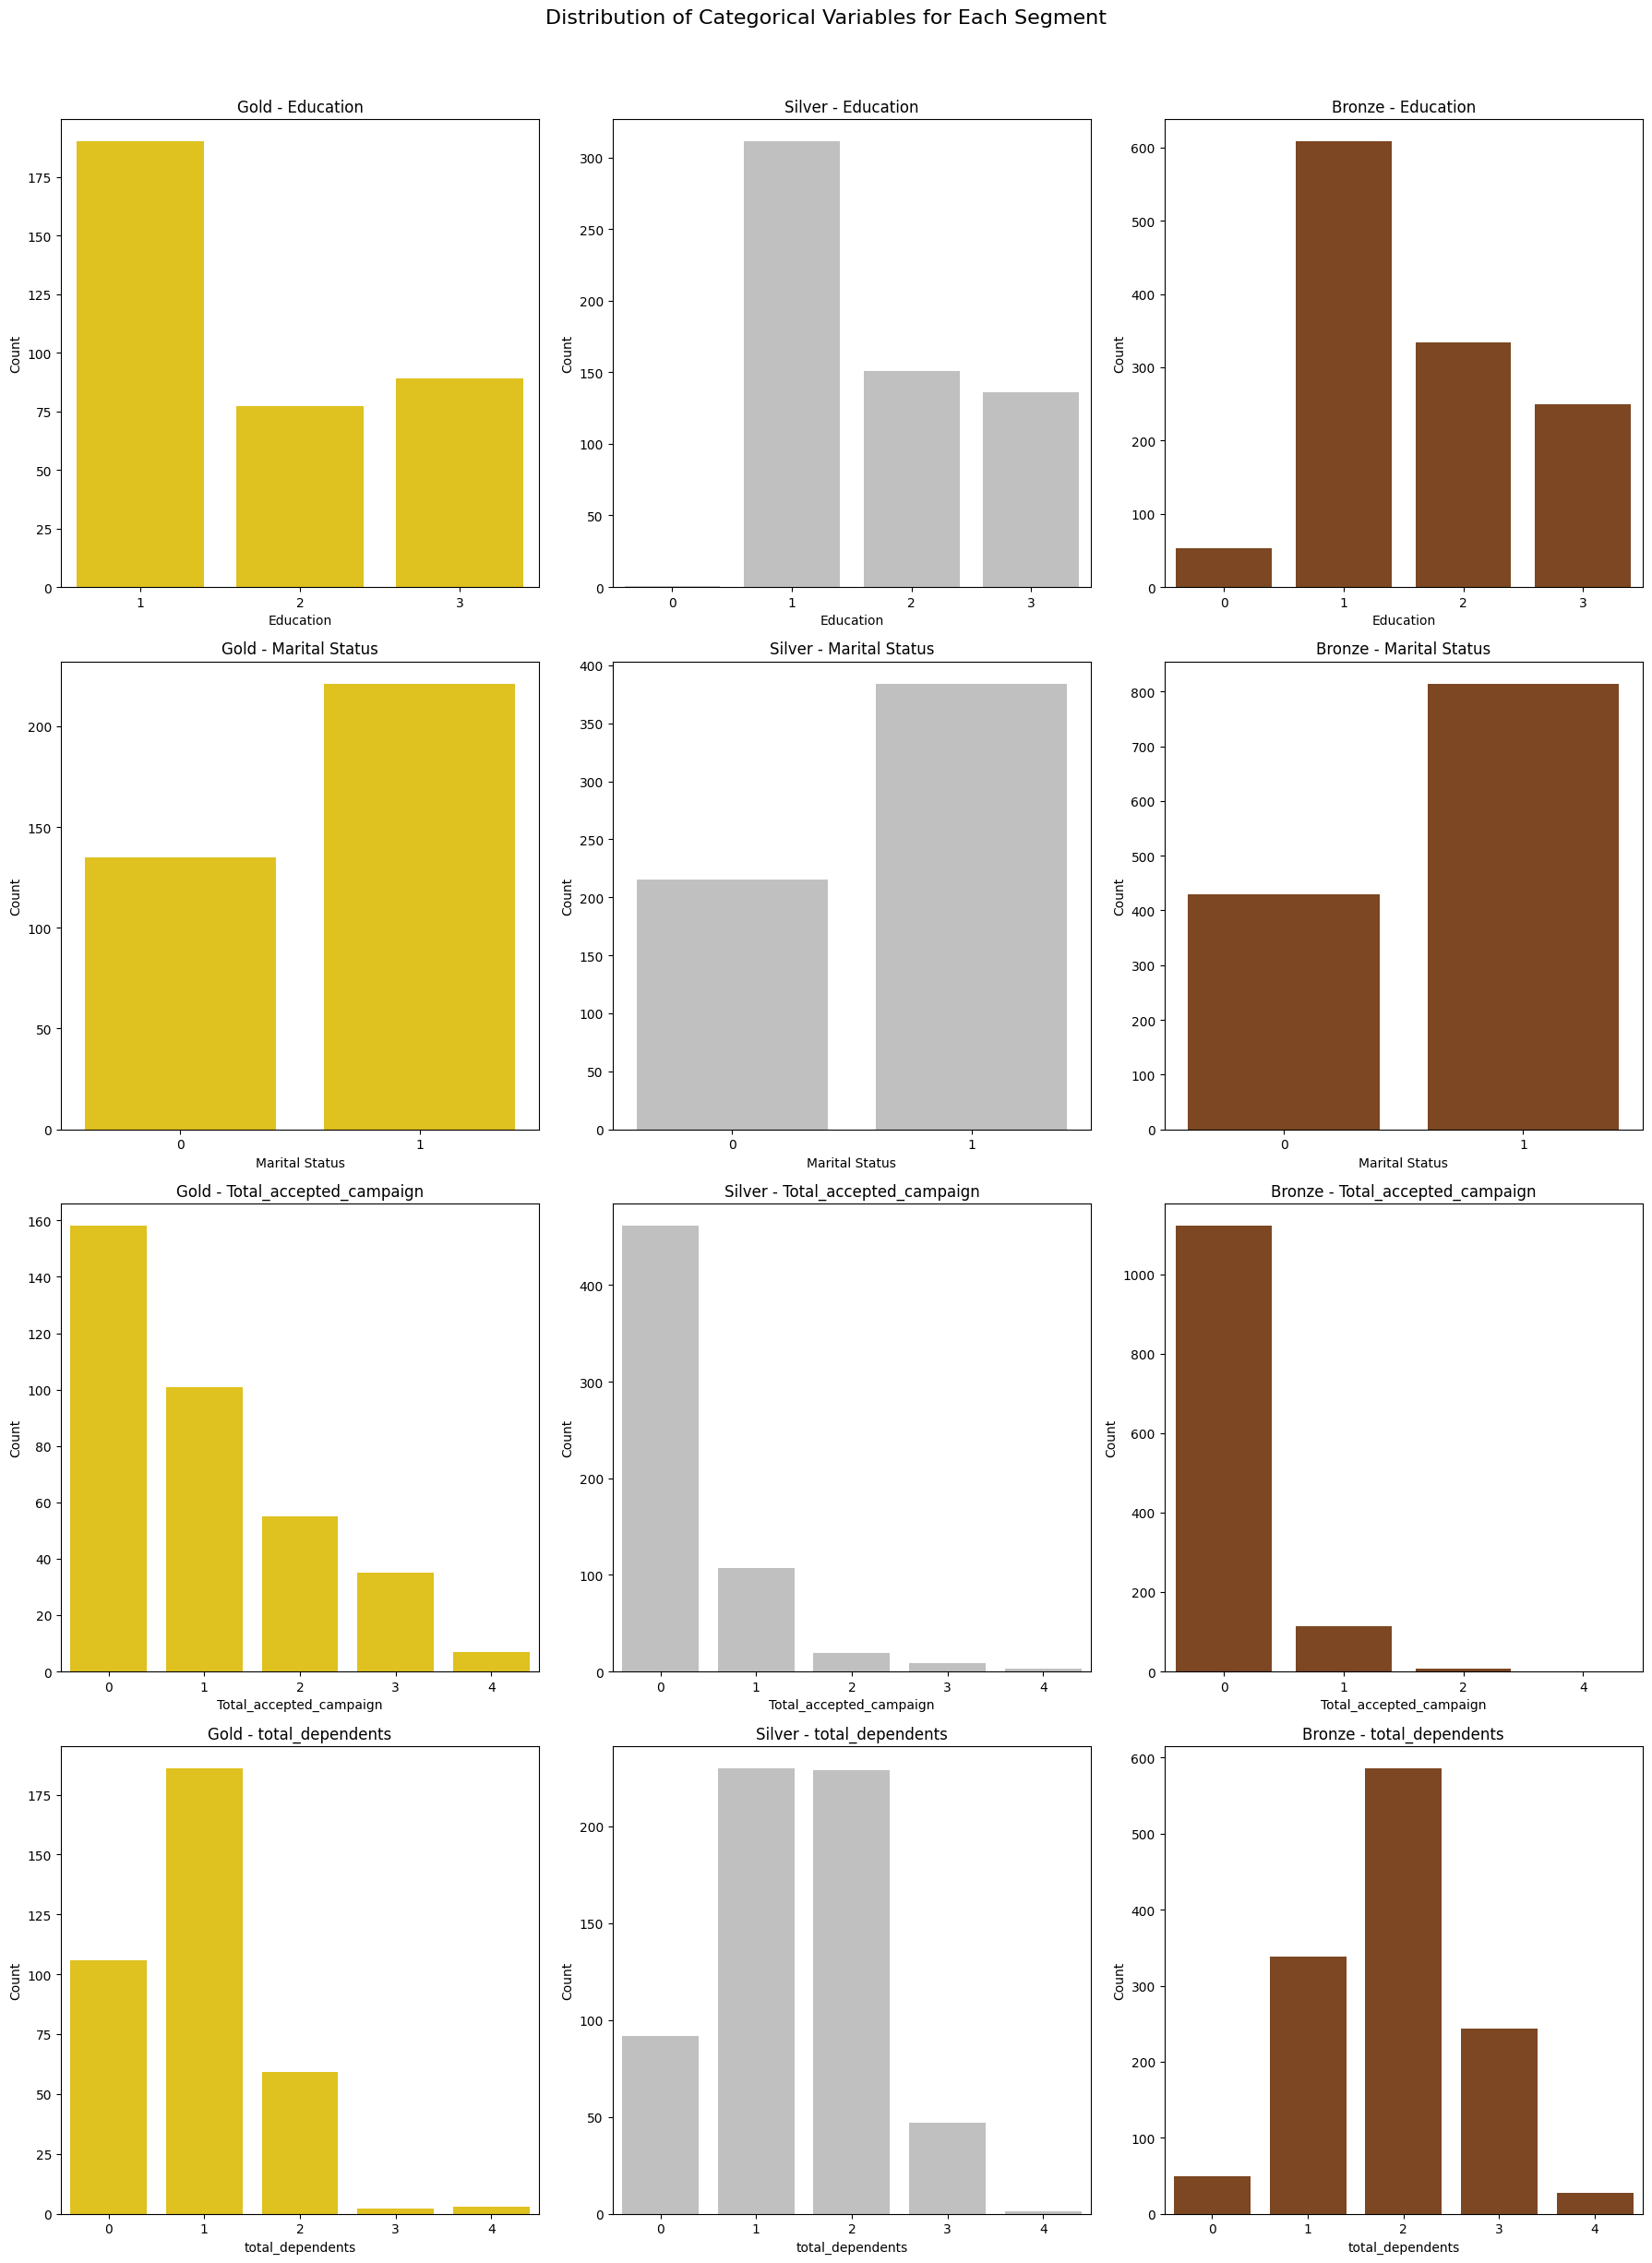

In [16]:
# Create subplots for categorical variables
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=3, figsize=(18, 6*len(categorical_vars)))
fig.suptitle('Distribution of Categorical Variables for Each Segment', y=1.02, fontsize=16)

for i, var in enumerate(categorical_vars):
    for j, segment in enumerate(['Gold', 'Silver', 'Bronze']):
        segment_data = X[X['Segment'] == segment]
        ax = axes[i, j]
        sns.countplot(data=segment_data, x=var, hue='Segment', palette=segment_colors, hue_order=hue_order, ax=ax)
        ax.set_title(f'{segment} - {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Count')
        ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

### Numerical Analysis

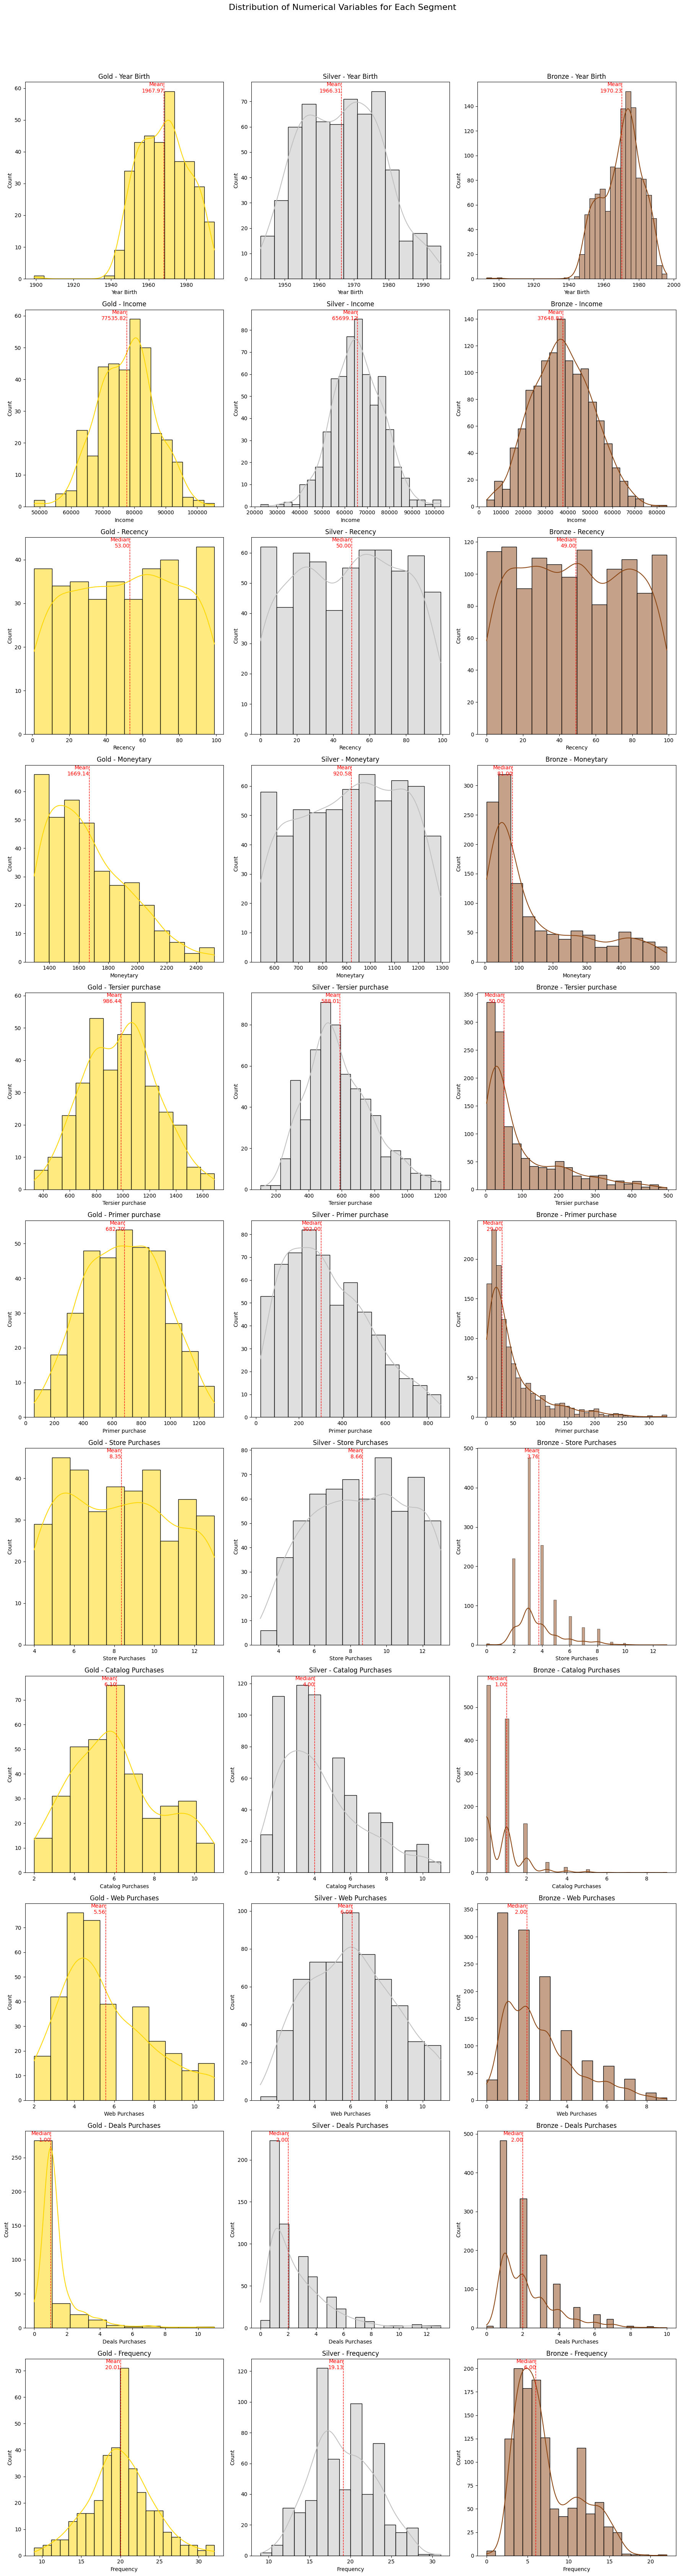

In [17]:
# Function to calculate the coefficient of variation (CV)
def calculate_cv(data):
    mean_val = np.mean(data)
    std_dev = np.std(data)
    if mean_val == 0:
        return 0
    return std_dev / mean_val

# Create subplots for numerical variables with mean or median
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=3, figsize=(18, 6*len(numerical_vars)))
fig.suptitle('Distribution of Numerical Variables for Each Segment', y=1.02, fontsize=16)

for i, var in enumerate(numerical_vars):
    for j, segment in enumerate(['Gold', 'Silver', 'Bronze']):
        segment_data = X[X['Segment'] == segment]
        ax = axes[i, j]
        sns.histplot(segment_data[var], kde=True, color=segment_colors[segment], label=segment, ax=ax)

        # Calculate the coefficient of variation
        cv = calculate_cv(segment_data[var])
        
        # Decide whether to display mean or median based on CV
        if cv > 0.5:
            central_val = np.median(segment_data[var])
            text_pos = 'Median'
        else:
            central_val = np.mean(segment_data[var])
            text_pos = 'Mean'
        
        ax.axvline(central_val, color='red', linestyle='dashed', linewidth=1)
        ax.text(central_val, ax.get_ylim()[1], f'{text_pos}\n{central_val:.2f}', color='red', va='top', ha='right')
        
        ax.set_title(f'{segment} - {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


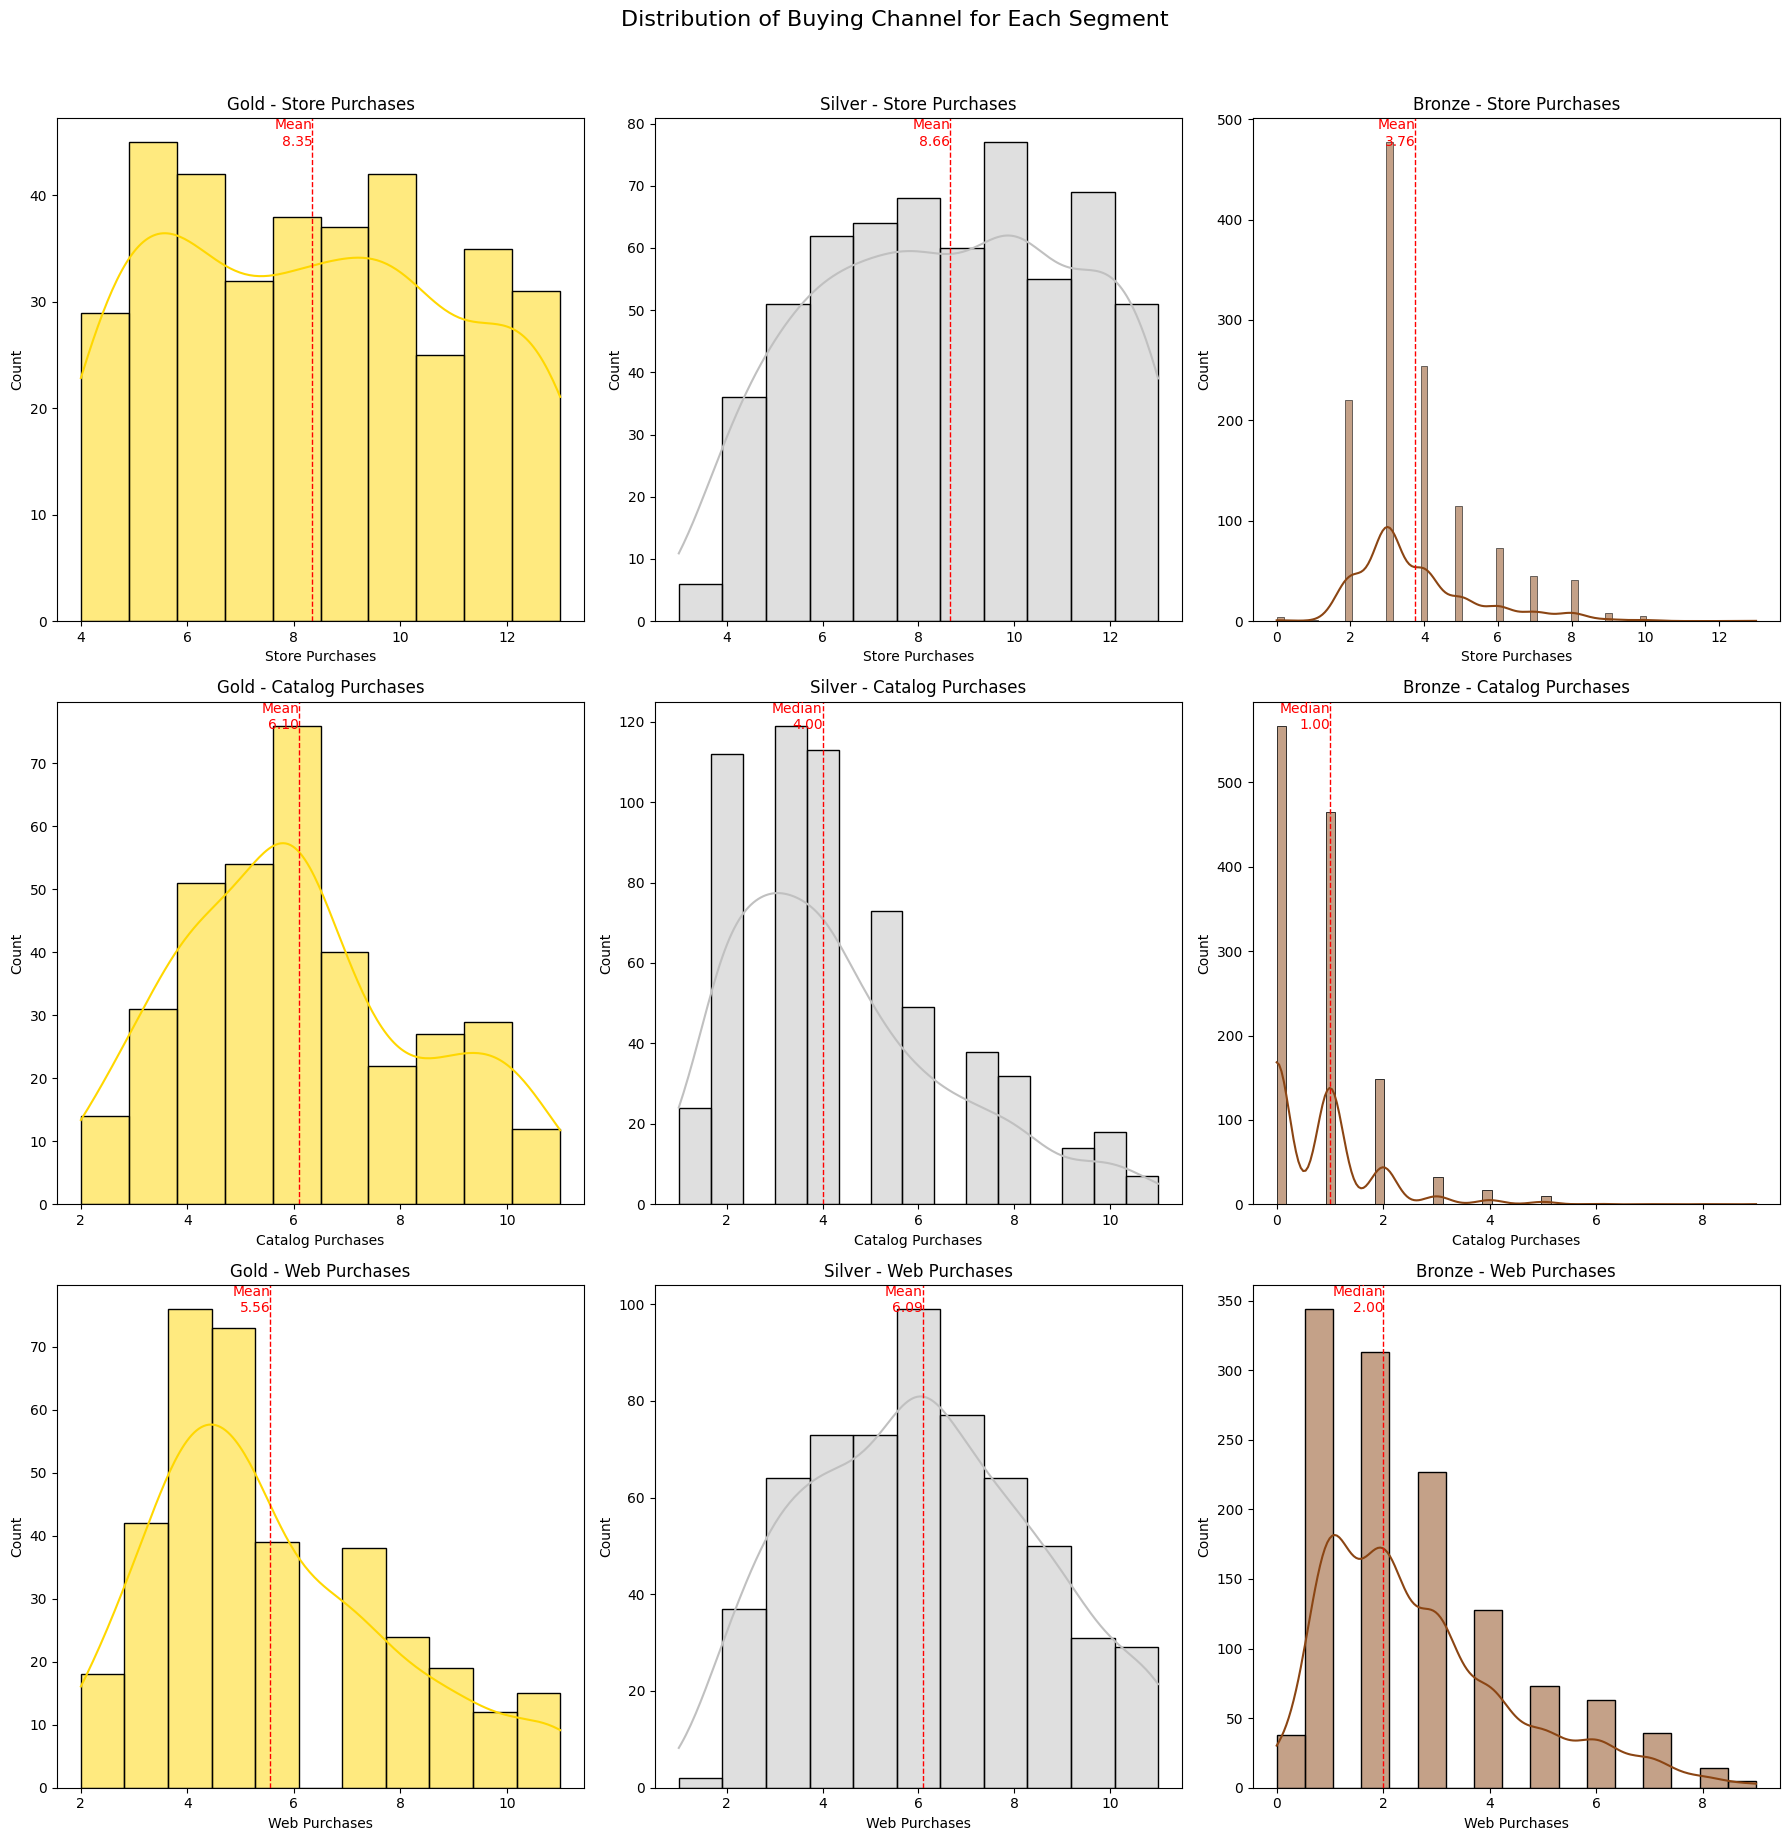

In [18]:
# Create subplots for numerical variables with mean or median
fig, axes = plt.subplots(nrows=len(buying_channel_vars), ncols=3, figsize=(18, 6*len(buying_channel_vars)))
fig.suptitle('Distribution of Buying Channel for Each Segment', y=1.02, fontsize=16)

for i, var in enumerate(buying_channel_vars):
    for j, segment in enumerate(['Gold', 'Silver', 'Bronze']):
        ax = axes[i, j]
        sns.histplot(X[X['Segment'] == segment][var], kde=True, color=segment_colors[segment], label=segment, ax=ax)

        # Calculate the coefficient of variation
        cv = calculate_cv(X[X['Segment'] == segment][var])
        
        # Decide whether to display mean or median based on CV
        if cv > 0.5:
            central_val = np.median(X[X['Segment'] == segment][var])
            text_pos = 'Median'
        else:
            central_val = np.mean(X[X['Segment'] == segment][var])
            text_pos = 'Mean'
        
        ax.axvline(central_val, color='red', linestyle='--', linewidth=1)
        ax.text(central_val, ax.get_ylim()[1], f'{text_pos}\n{central_val:.2f}', color='red', va='top', ha='right')
        
        ax.set_title(f'{segment} - {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


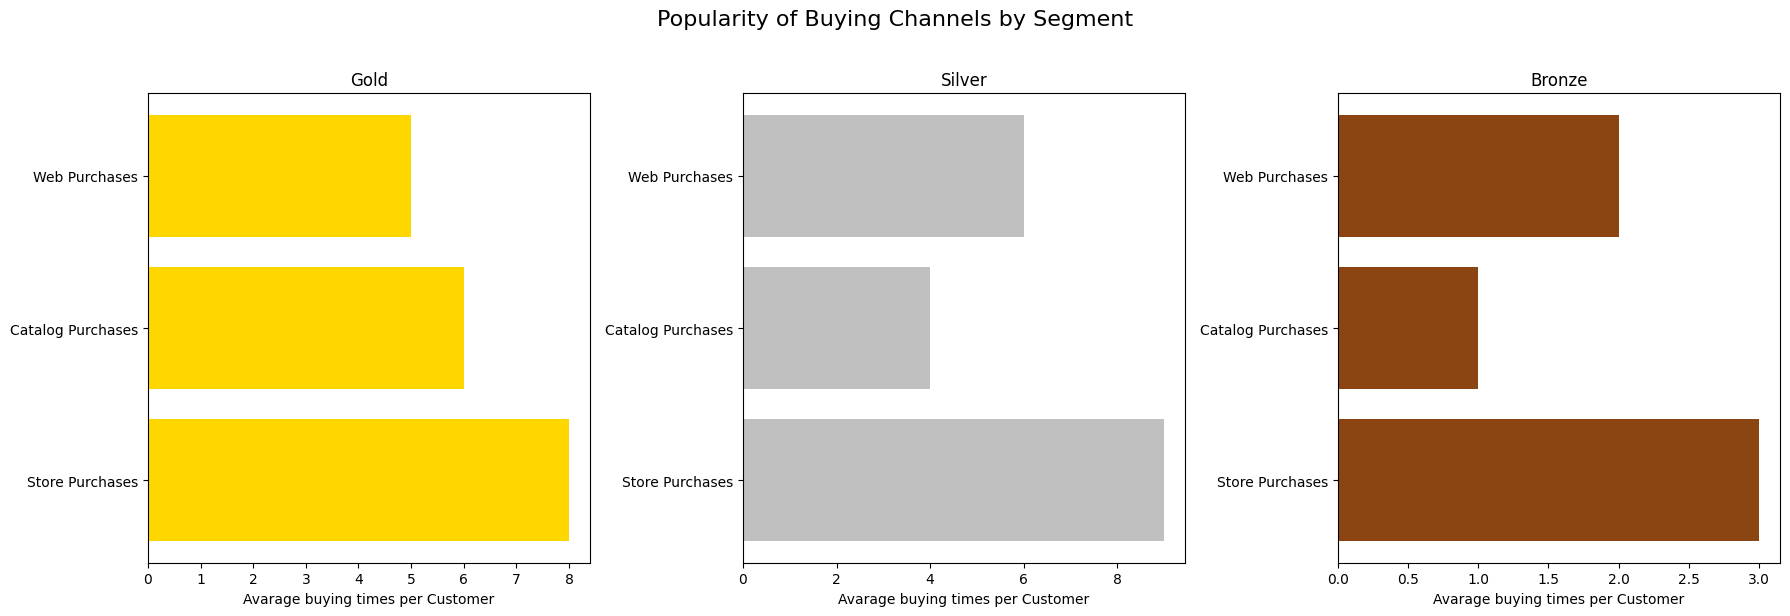

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Popularity of Buying Channels by Segment', y=1.02, fontsize=16)

for j, segment in enumerate(['Gold', 'Silver', 'Bronze']):
    ax = axes[j]
    segment_data = X[X['Segment'] == segment]
    
    buying_channel_counts = [segment_data[channel].median() for channel in buying_channel_vars]
    
    ax.barh(buying_channel_vars, buying_channel_counts, color=segment_colors[segment])
    ax.set_title(f'{segment}')
    ax.set_xlabel('Avarage buying times per Customer')

plt.tight_layout()
plt.show()

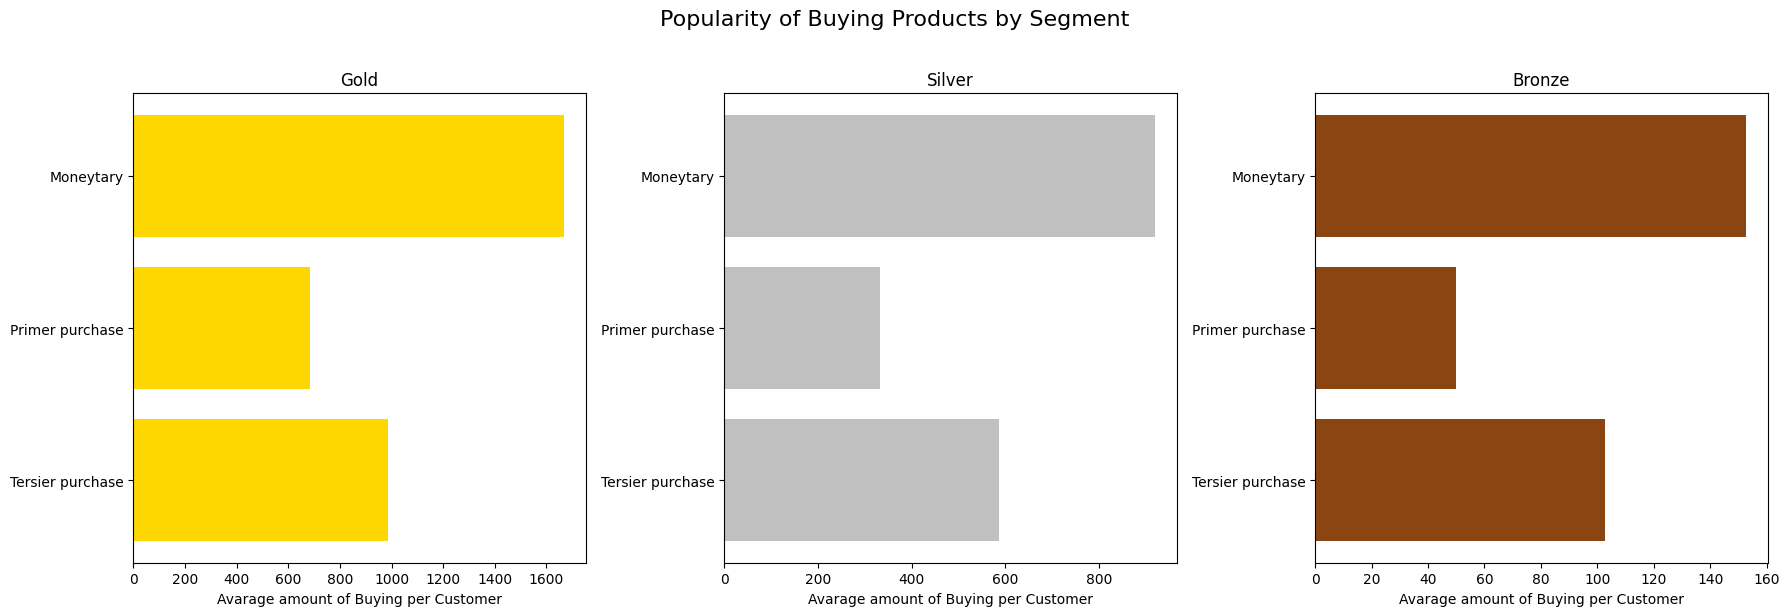

In [20]:
# Define buying channels
buying_products = ['Tersier purchase', 'Primer purchase', 'Moneytary']

# Create a bar plot to show the popularity of buying products in each segment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Popularity of Buying Products by Segment', y=1.02, fontsize=16)

for j, segment in enumerate(['Gold', 'Silver', 'Bronze']):
    ax = axes[j]
    segment_data = df[df['Segment'] == segment]
    
    buying_products_counts = [segment_data[channel].mean() for channel in buying_products]
    
    ax.barh(buying_products, buying_products_counts, color=segment_colors[segment])
    ax.set_title(f'{segment}')
    ax.set_xlabel('Avarage amount of Buying per Customer')

plt.tight_layout()
plt.show()


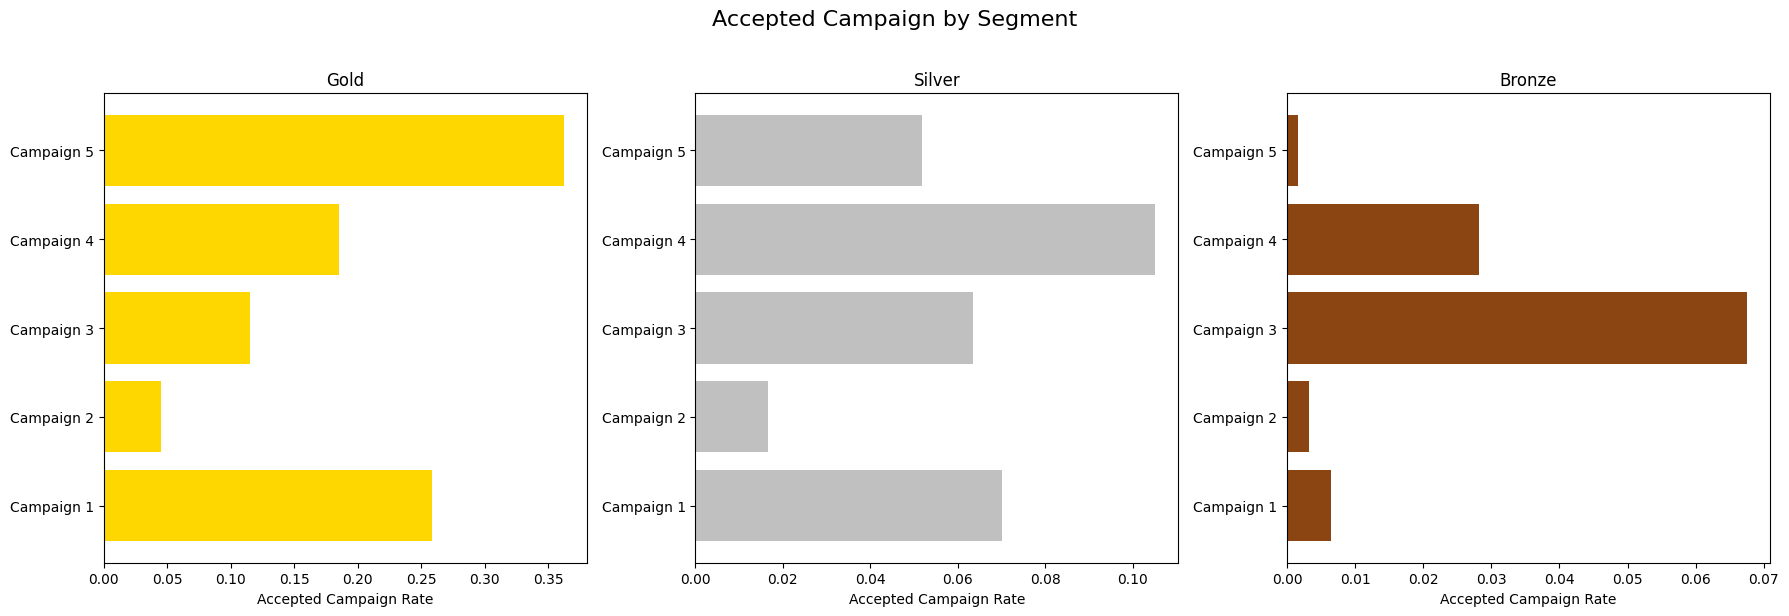

In [21]:
# Define buying channels
accepted_campaign = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']

# Create a bar plot to show the popularity of buying products in each segment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Accepted Campaign by Segment', y=1.02, fontsize=16)

for j, segment in enumerate(['Gold', 'Silver', 'Bronze']):
    ax = axes[j]
    segment_data = df[df['Segment'] == segment]
    
    accepted_campaign_rate = [segment_data[channel].mean() for channel in accepted_campaign]
    
    ax.barh(accepted_campaign, accepted_campaign_rate, color=segment_colors[segment])
    ax.set_title(f'{segment}')
    ax.set_xlabel('Accepted Campaign Rate')

plt.tight_layout()
plt.show()


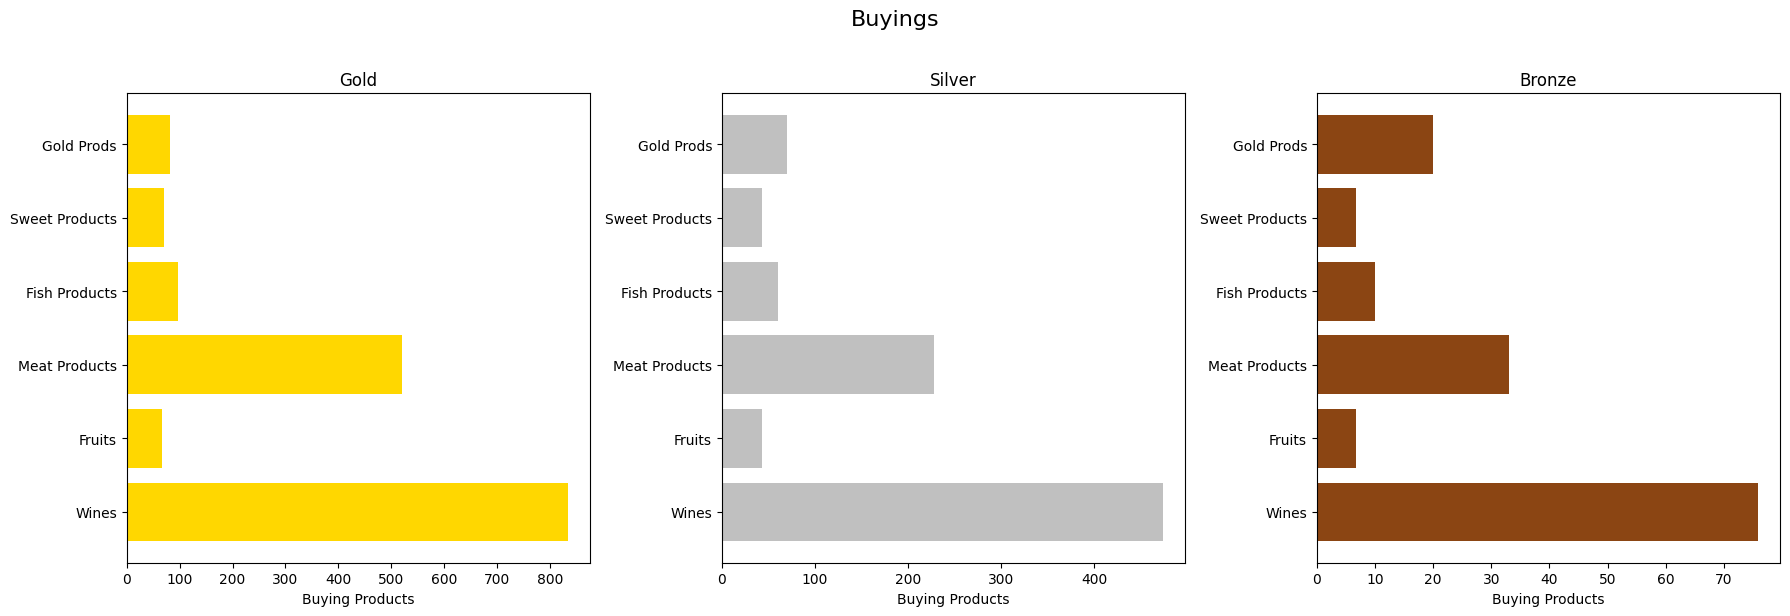

In [22]:
# Define buying channels
buyings = ['Wines','Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Prods']

# Create a bar plot to show the popularity of buying products in each segment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Buyings', y=1.02, fontsize=16)

for j, segment in enumerate(['Gold', 'Silver', 'Bronze']):
    ax = axes[j]
    segment_data = df[df['Segment'] == segment]
    
    buying_amount = [segment_data[channel].mean() for channel in buyings]
    
    ax.barh(buyings, buying_amount, color=segment_colors[segment])
    ax.set_title(f'{segment}')
    ax.set_xlabel('Buying Products')

plt.tight_layout()
plt.show()


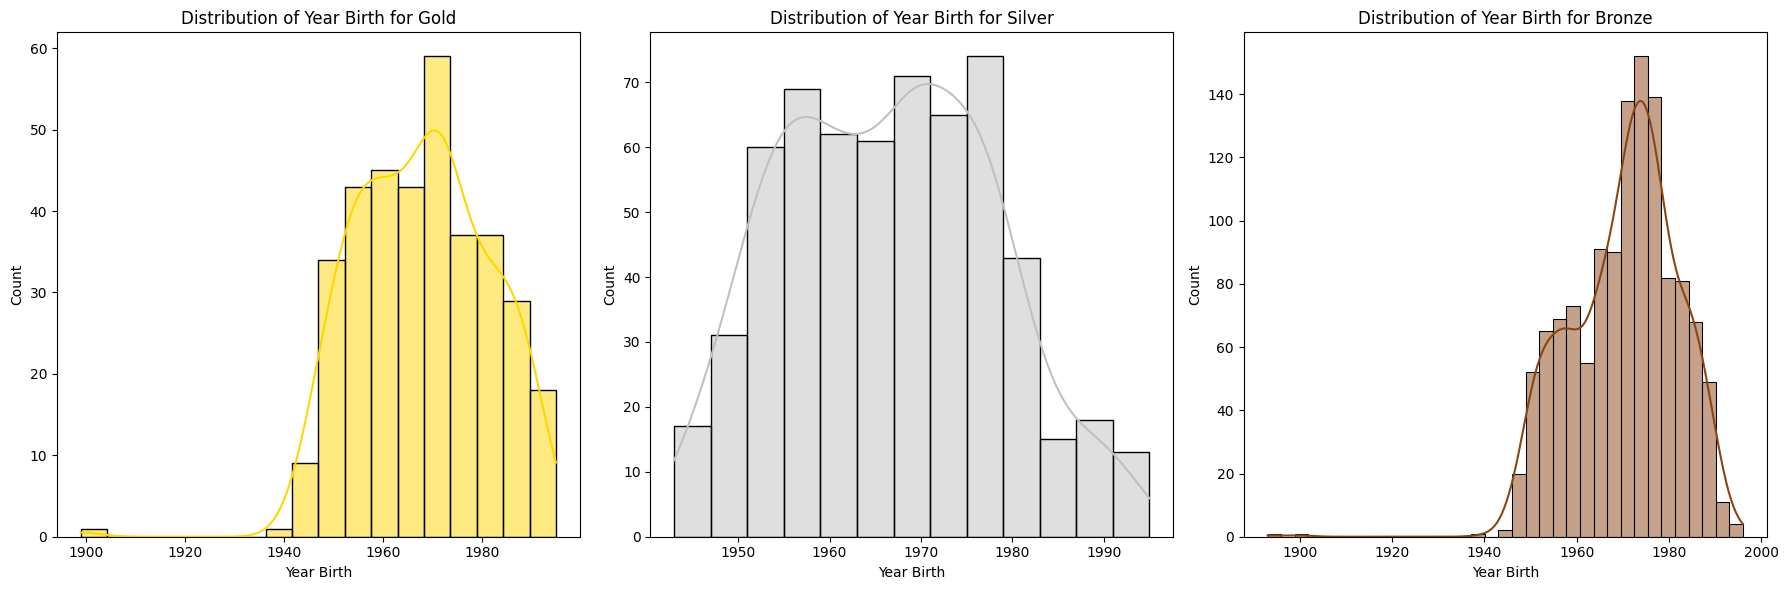

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each segment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterate through each segment
for i, segment in enumerate(['Gold', 'Silver', 'Bronze']):
    ax = axes[i]
    sns.histplot(df[df['Segment'] == segment]['Year Birth'], kde=True, color=segment_colors[segment], label=segment, ax=ax)
    ax.set_title(f'Distribution of Year Birth for {segment}')
    ax.set_xlabel('Year Birth')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


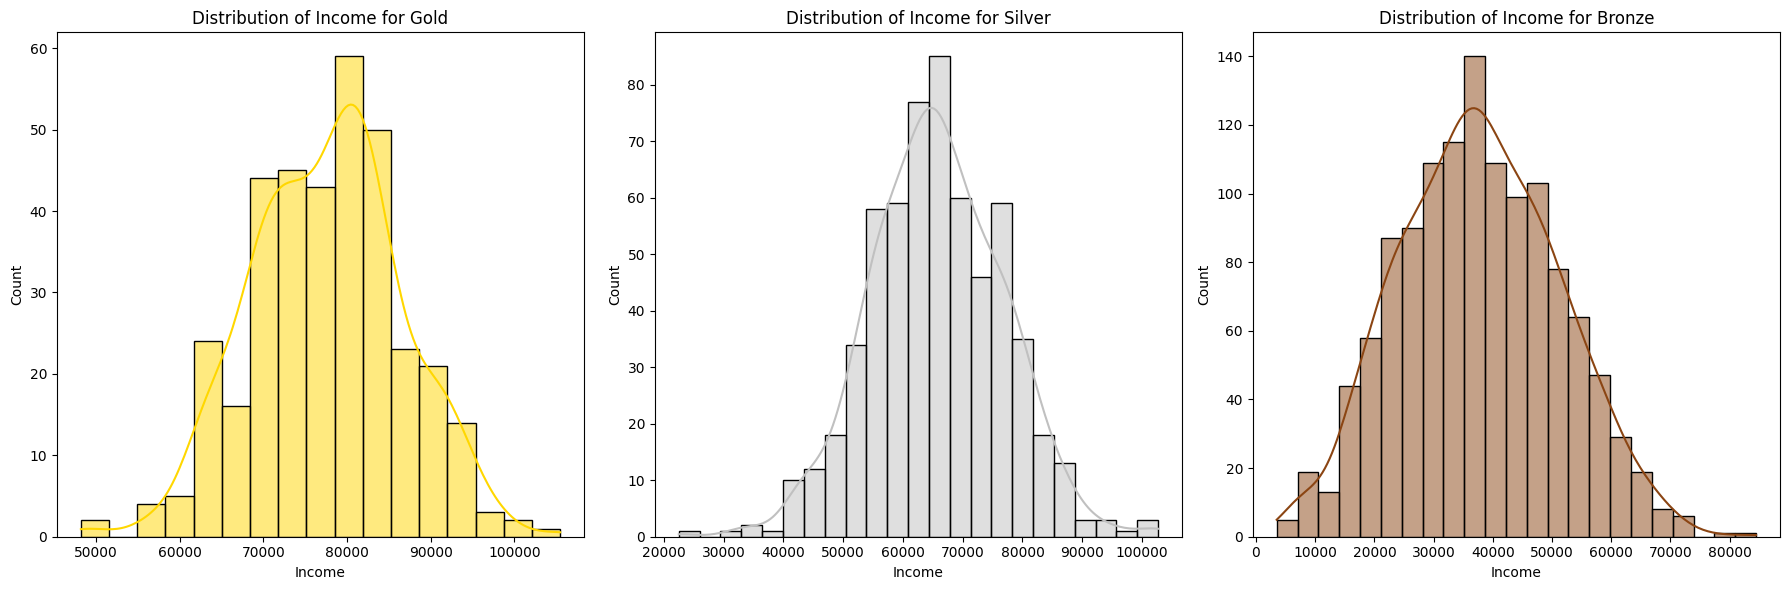

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each segment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterate through each segment
for i, segment in enumerate(['Gold', 'Silver', 'Bronze']):
    ax = axes[i]
    sns.histplot(df[df['Segment'] == segment]['Income'], kde=True, color=segment_colors[segment], label=segment, ax=ax)
    ax.set_title(f'Distribution of Income for {segment}')
    ax.set_xlabel('Income')

plt.tight_layout()
plt.show()


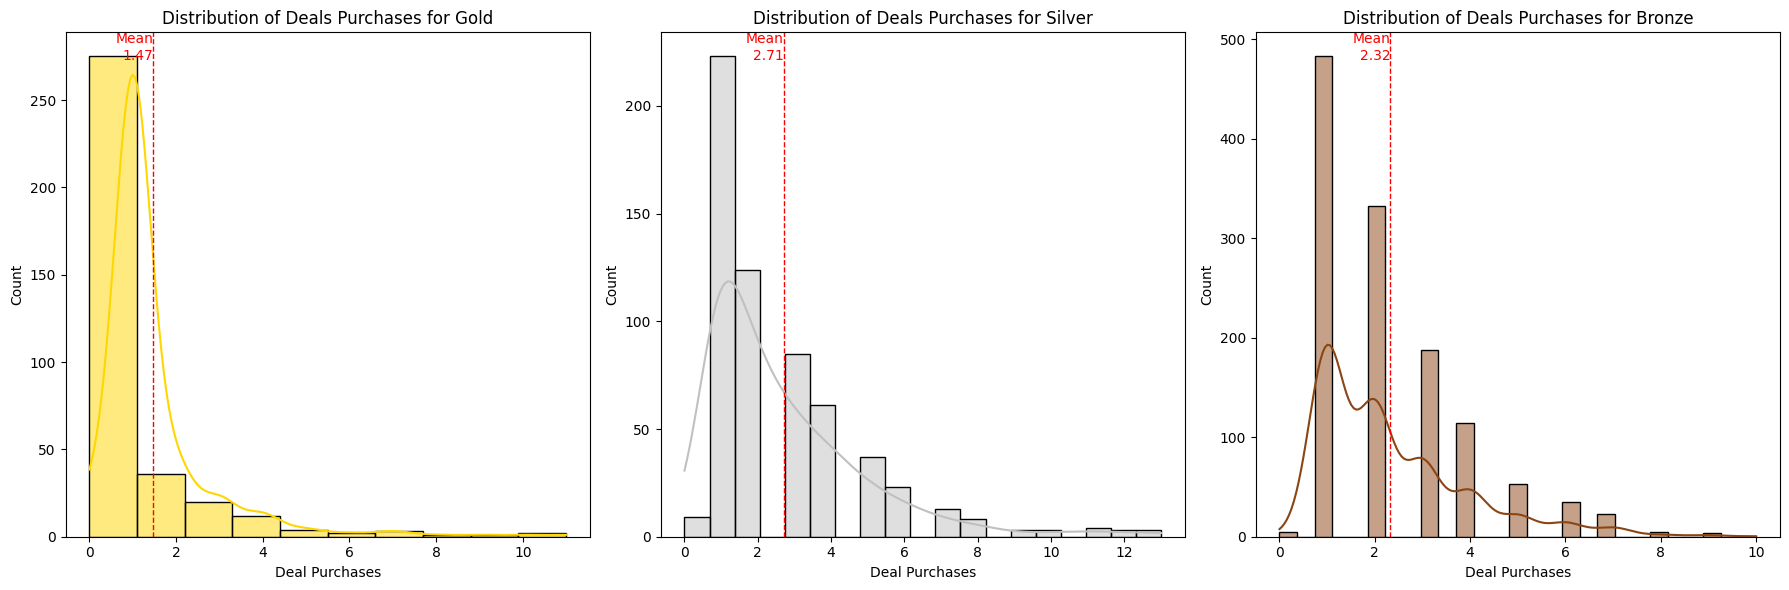

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create subplots for each segment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Iterate through each segment
for i, segment in enumerate(['Gold', 'Silver', 'Bronze']):
    ax = axes[i]
    deals_purchases_data = df[df['Segment'] == segment]['Deals Purchases']
    
    # Calculate the coefficient of variation
    cv = np.std(deals_purchases_data) / np.mean(deals_purchases_data)
     
    central_val = np.mean(deals_purchases_data)
    text_pos = 'Mean'
    
    sns.histplot(deals_purchases_data, kde=True, color=segment_colors[segment], label=segment, ax=ax)
    ax.axvline(central_val, color='red', linestyle='--', linewidth=1)
    ax.text(central_val, ax.get_ylim()[1], f'{text_pos}\n{central_val:.2f}', color='red', va='top', ha='right')
    
    ax.set_title(f'Distribution of Deals Purchases for {segment}')
    ax.set_xlabel('Deal Purchases')

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Assuming df is your DataFrame containing the necessary data
# Replace 'YourColumnName' with the actual column names for Recency, Frequency, and Monetary Value

# Calculate mean for each segment
mean_recency = X.groupby('Segment')['Recency'].mean()
mean_frequency = X.groupby('Segment')['Frequency'].mean()
mean_monetary_value = X.groupby('Segment')['Moneytary'].mean()

mean_recency_gold = mean_recency.loc['Gold']
mean_frequency_gold = mean_frequency.loc['Gold']
mean_monetary_gold = mean_monetary_value.loc['Gold']

# Extract the mean values for the 'Silver' segment
mean_recency_silver = mean_recency.loc['Silver']
mean_frequency_silver = mean_frequency.loc['Silver']
mean_monetary_silver = mean_monetary_value.loc['Silver']

# Extract the mean values for the 'Bronze' segment
mean_recency_bronze = mean_recency.loc['Bronze']
mean_frequency_bronze = mean_frequency.loc['Bronze']
mean_monetary_bronze = mean_monetary_value.loc['Bronze']



# Logistic Regression

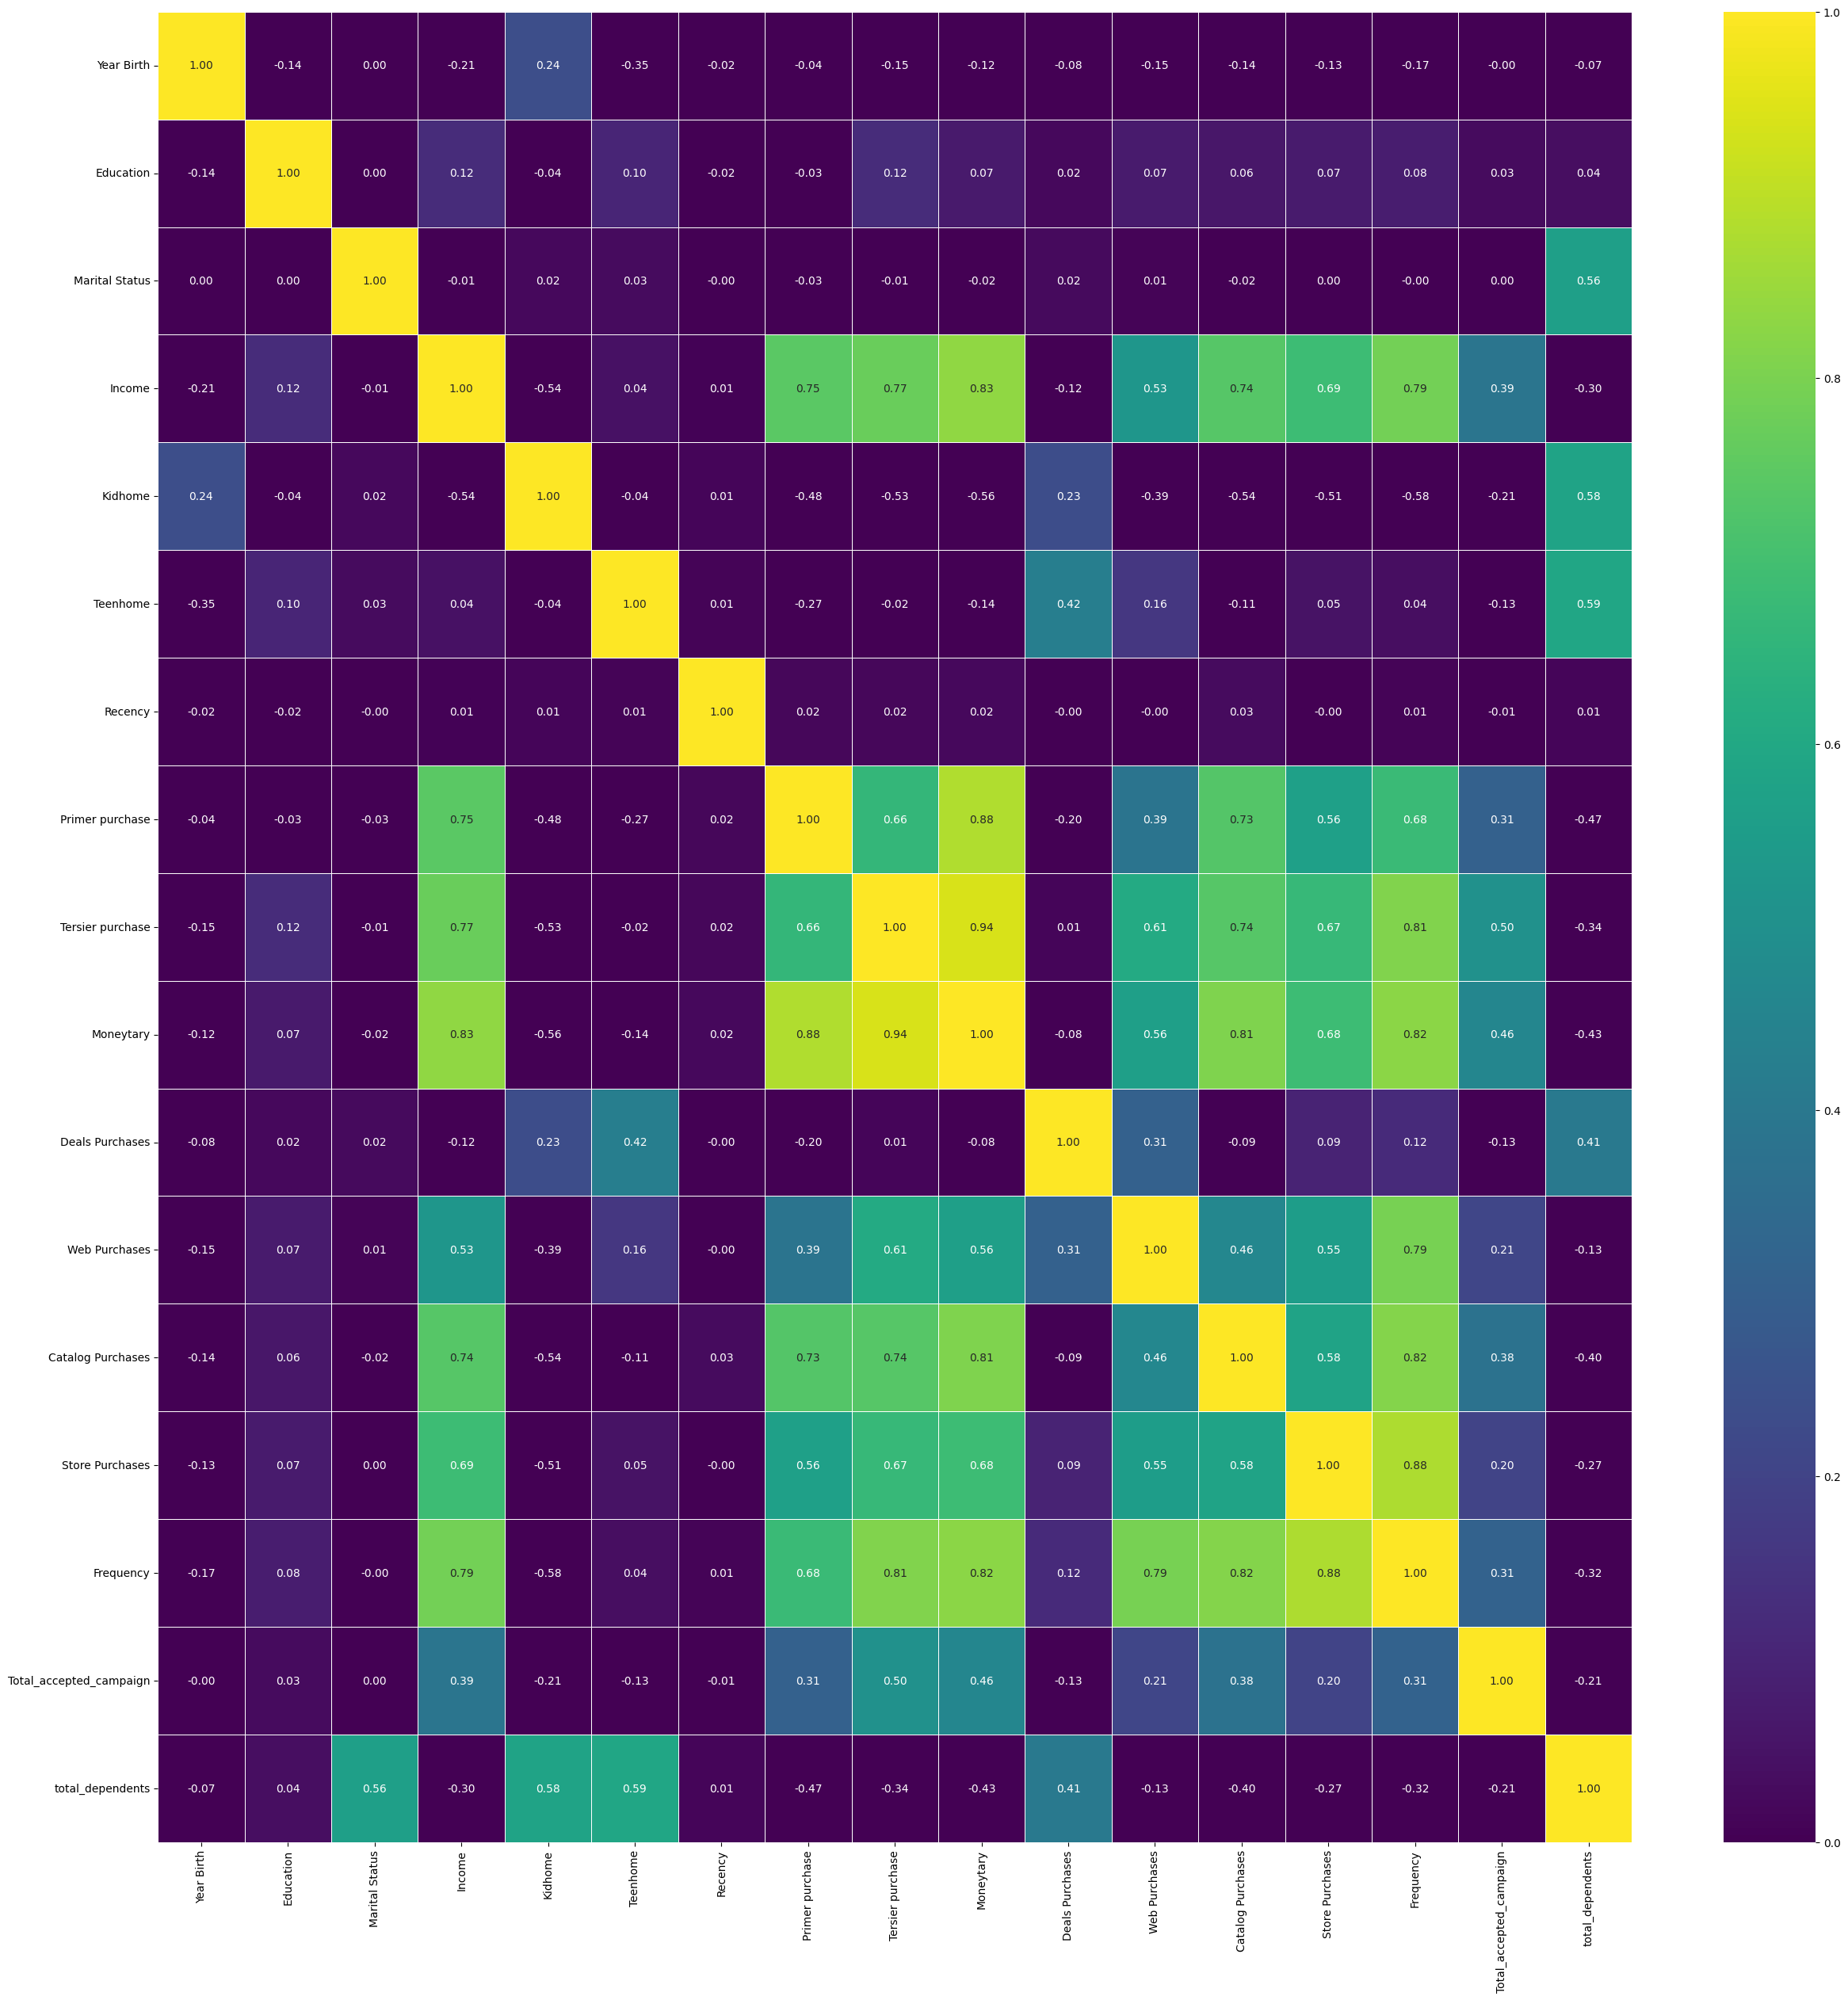

In [27]:
#heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(X.drop(['Response', 'Segment'], axis=1).corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show()

In [28]:
### VIF Checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif_check = X.drop(['Income','Response', 'Segment','Tersier purchase','Primer purchase','Store Purchases','Catalog Purchases','Web Purchases','Marital Status','Teenhome','Kidhome'], axis=1)

vif_results = pd.DataFrame()
vif_results['Feature'] = vif_check.columns

vif_results['VIF'] = [variance_inflation_factor(vif_check.values, i) for i in range(len(vif_check.columns))]
vif_results = vif_results.sort_values(by='VIF', ascending=False)  # Corrected assignment

# Print or further process vif_results as needed
print(vif_results)

                   Feature        VIF
0               Year Birth  15.710436
5                Frequency  14.731143
3                Moneytary   8.292440
7         total_dependents   6.140930
1                Education   4.975595
2                  Recency   3.886301
4          Deals Purchases   3.651699
6  Total_accepted_campaign   1.550699


Accuracy for segment Gold: 0.7289719626168224
Classification Report for segment Gold:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        73
           1       0.57      0.59      0.58        34

    accuracy                           0.73       107
   macro avg       0.69      0.69      0.69       107
weighted avg       0.73      0.73      0.73       107



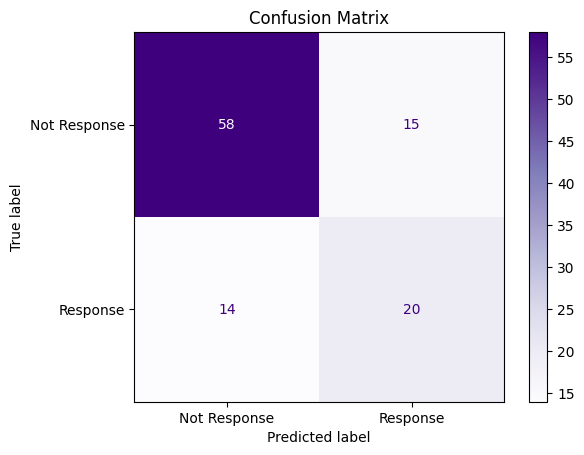

Accuracy for segment Silver: 0.7888888888888889
Classification Report for segment Silver:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       155
           1       0.36      0.64      0.46        25

    accuracy                           0.79       180
   macro avg       0.64      0.73      0.66       180
weighted avg       0.85      0.79      0.81       180



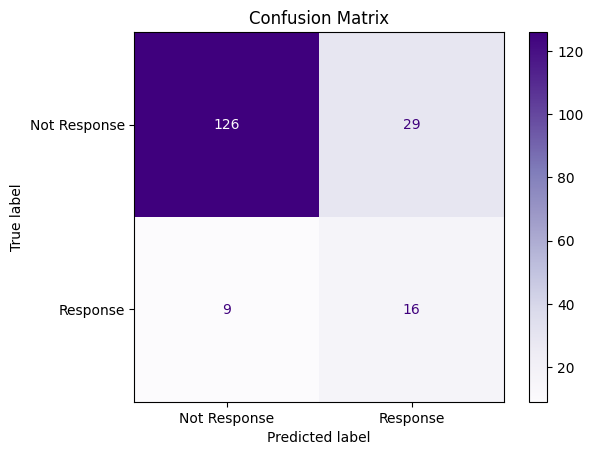

Accuracy for segment Bronze: 0.8368983957219251
Classification Report for segment Bronze:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       327
           1       0.41      0.72      0.53        47

    accuracy                           0.84       374
   macro avg       0.69      0.79      0.71       374
weighted avg       0.89      0.84      0.85       374



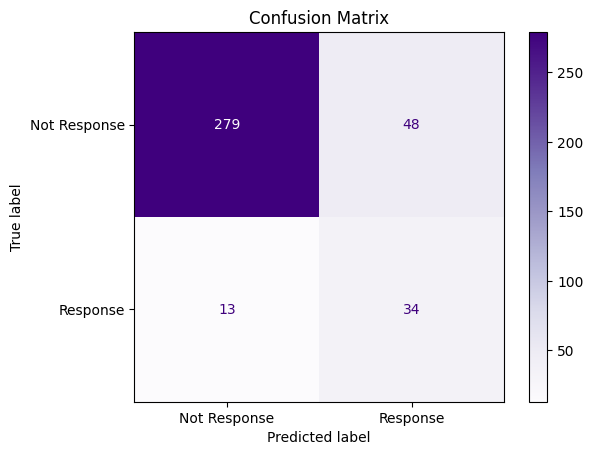

In [30]:
# Iterate through segments
for segment in ['Gold', 'Silver', 'Bronze']:
    # Filter data for the current segment
    segment_data = X[X['Segment'] == segment]
    
    # Define features and the target for the current segment
    features = segment_data.drop(['Income','Response', 'Segment','Tersier purchase','Primer purchase','Store Purchases','Catalog Purchases','Web Purchases','Marital Status','Teenhome','Kidhome'], axis=1)
    target = segment_data['Response']
    
    # Create the scaler object
    scaler = StandardScaler()
    
    # Scale the features for the current segment
    features_scaled = scaler.fit_transform(features)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

    # Use oversampling with increased sampling strategy
    from imblearn.over_sampling import SMOTE
    X_train, y_train = SMOTE(sampling_strategy=0.7).fit_resample(X_train, y_train)
    
    # Fit the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model for the current segment
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for segment {segment}: {accuracy}")

    # Display classification report for the current segment
    print(f"Classification Report for segment {segment}:\n{classification_report(y_test, y_pred)}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Response", "Response"])
    cm_display.plot(cmap='Purples') 
    plt.title('Confusion Matrix')
    plt.show()
    
    


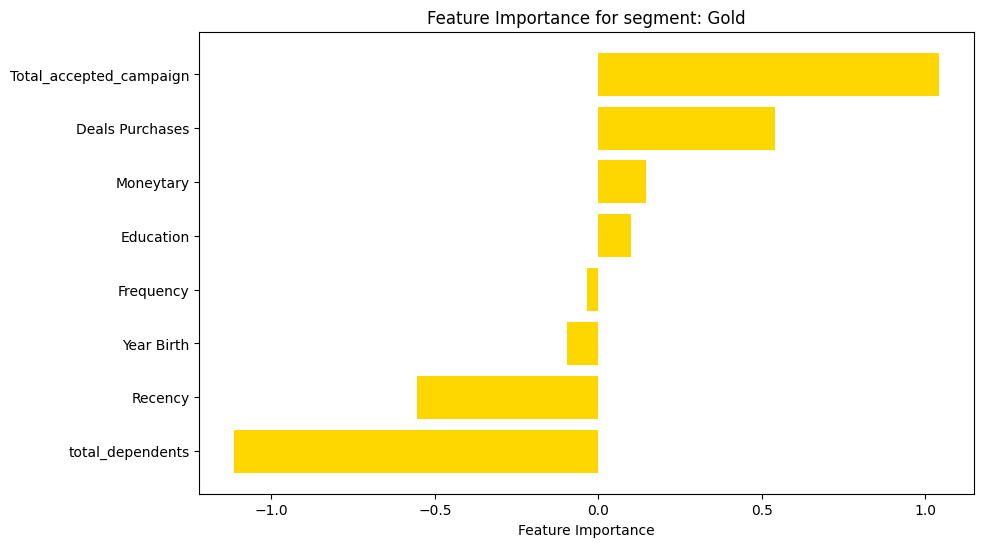

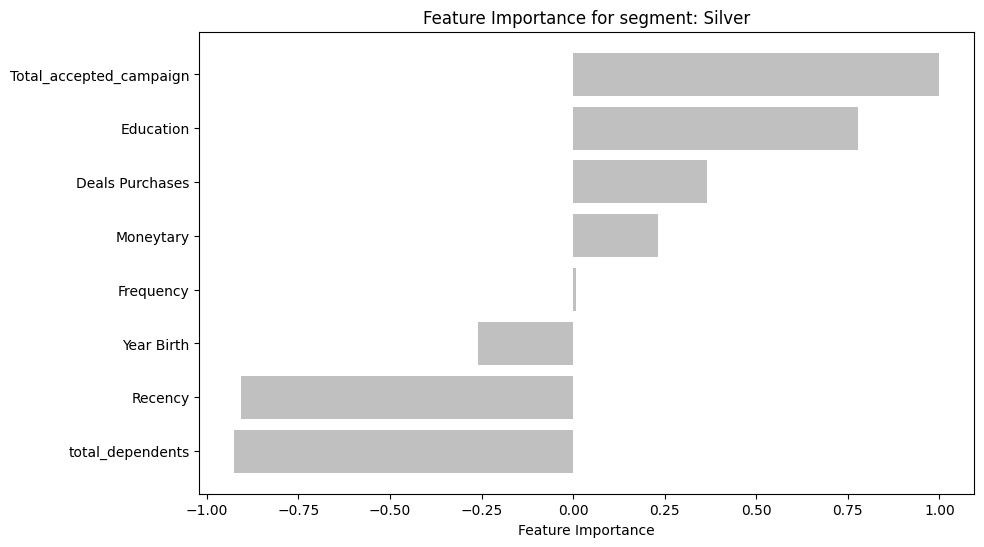

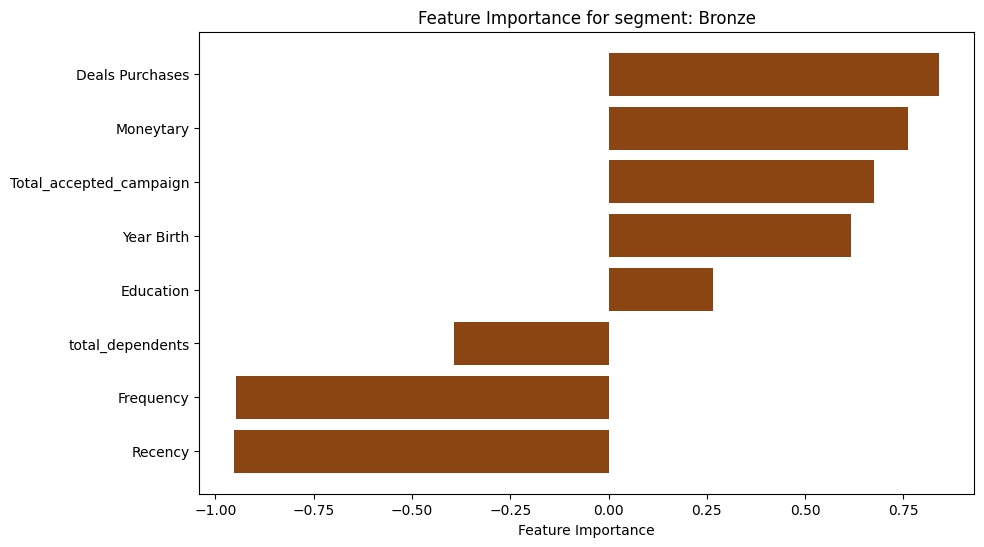

In [32]:
# Create a function to visualize feature importance
def plot_feature_importance(features, importance, segment, segment_colors):
    sorted_idx = np.argsort(importance)
    features_sorted = [features[i] for i in sorted_idx]
    importance_sorted = [importance[i] for i in sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(features_sorted, importance_sorted, color=[segment_colors[segment]]) 
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance for segment: {segment}')
    plt.show()

# Iterate through segments
for segment in ['Gold', 'Silver', 'Bronze']:
    # Filter data for the current segment
    segment_data = X[X['Segment'] == segment]
    
    # Define features and the target for the current segment
    features = segment_data.drop(['Income','Response', 'Segment','Tersier purchase','Primer purchase','Store Purchases','Catalog Purchases','Web Purchases','Marital Status','Teenhome','Kidhome'], axis=1)
    target = segment_data['Response']
    
    # Create the scaler object
    scaler = StandardScaler()
    
    # Scale the features for the current segment
    features_scaled = scaler.fit_transform(features)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)
    
    # Use oversampling with increased sampling strategy
    from imblearn.over_sampling import SMOTE
    X_train, y_train = SMOTE(sampling_strategy=0.7).fit_resample(X_train, y_train)
    
    # Fit the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Extract feature importance
    feature_importance = model.coef_[0]  # Coefficients of features

    # Visualize feature importance for the current segment
    plot_feature_importance(features.columns, feature_importance, segment, segment_colors)


Accuracy for the entire dataset: 0.8757575757575757
Classification Report for the entire dataset:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       570
           1       0.54      0.66      0.59        90

    accuracy                           0.88       660
   macro avg       0.74      0.78      0.76       660
weighted avg       0.89      0.88      0.88       660



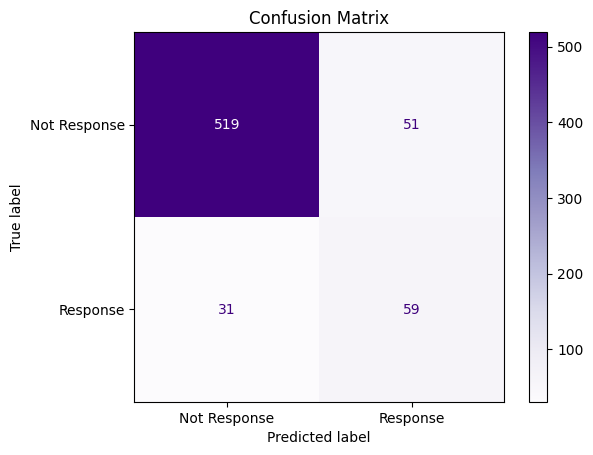

In [33]:
# Define features and the target for the entire dataset
total_features = X.drop(['Income', 'Response', 'Segment', 'Tersier purchase', 'Primer purchase',
                         'Store Purchases', 'Catalog Purchases', 'Web Purchases', 'Marital Status',
                         'Teenhome', 'Kidhome'], axis=1)
total_target = X['Response']

# Create the scaler object
scaler = StandardScaler()

# Scale the features for the entire dataset
total_features_scaled = scaler.fit_transform(total_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(total_features_scaled, total_target, test_size=0.3, random_state=42)

#use oversampling
from imblearn import under_sampling, over_sampling
#x_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=1).fit_resample(x,y)
#X_train, y_train = over_sampling.RandomOverSampler(sampling_strategy=0.5).fit_resample(X_train,y_train)
X_train, y_train = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X_train,y_train)

# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model for the entire dataset
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for the entire dataset: {accuracy}")

# Display classification report for the entire dataset
print(f"Classification Report for the entire dataset:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Response", "Response"])
cm_display.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Iterate through segments
for segment in ['Gold', 'Silver', 'Bronze']:
    # Filter data for the current segment
    segment_data = X[X['Segment'] == segment]
    
    # Define features and the target for the current segment
    features = segment_data.drop(['Income','Response', 'Segment','Tersier purchase','Primer purchase','Store Purchases','Catalog Purchases','Web Purchases','Marital Status','Teenhome','Kidhome'], axis=1)
    target = segment_data['Response']
    
    # Create the scaler object
    scaler = StandardScaler()
    
    # Scale the features for the current segment
    features_scaled = scaler.fit_transform(features)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

    # Use oversampling with increased sampling strategy
    from imblearn.over_sampling import SMOTE
    X_train, y_train = SMOTE(sampling_strategy=0.7).fit_resample(X_train, y_train)
    
    # Fit the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Extract the coefficients and feature names
    coefficients = model.coef_[0]
    feature_names = features.columns

    # Calculate the impact of a one-unit change in feature importance on probabilities
    impact_on_probabilities = np.exp(coefficients) - 1  # Exponentiate coefficients to get impact on probabilities
    impact_df = pd.DataFrame({'Feature': feature_names, 'Impact on Probabilities': impact_on_probabilities})

    print(f"Impact of a one-unit change in feature importance on probabilities for segment {segment}:")
    print(impact_df)


Impact of a one-unit change in feature importance on probabilities for segment Gold:
                   Feature  Impact on Probabilities
0               Year Birth                -0.114351
1                Education                 0.118654
2                  Recency                -0.416951
3                Moneytary                 0.205057
4          Deals Purchases                 0.731305
5                Frequency                -0.007098
6  Total_accepted_campaign                 1.708585
7         total_dependents                -0.679204
Impact of a one-unit change in feature importance on probabilities for segment Silver:
                   Feature  Impact on Probabilities
0               Year Birth                -0.316776
1                Education                 0.995211
2                  Recency                -0.652248
3                Moneytary                 0.430077
4          Deals Purchases                 0.724902
5                Frequency                -0.037

In [35]:
import statsmodels.api as sm
# Iterate through segments
for segment in ['Gold', 'Silver', 'Bronze']:
    # Filter data for the current segment
    segment_data = X[X['Segment'] == segment]
    
    # Define features and the target for the current segment
    features = segment_data.drop(['Income','Response', 'Segment','Tersier purchase','Primer purchase','Store Purchases','Catalog Purchases','Web Purchases','Marital Status','Teenhome','Kidhome'], axis=1)
    target = segment_data['Response']
    
    # Create the scaler object
    scaler = StandardScaler()
    
    # Scale the features for the current segment
    features_scaled = scaler.fit_transform(features)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

    # Use oversampling with increased sampling strategy
    from imblearn.over_sampling import SMOTE
    X_train, y_train = SMOTE(sampling_strategy=0.7).fit_resample(X_train, y_train)
    
    # Fit the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Add a constant (intercept) to the features
    X_train = sm.add_constant(X_train)
    
    # Fit logistic regression model using statsmodels
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()

    # Predict on the test data
    y_pred = model.predict(X_test)

   # Display the results summary with variable names
    print(f"Logistic Regression Results for segment {segment}:")
    coef_names = ['Intercept'] + list(features.columns)  # Variable names including Intercept

    # Create a summary table with variable names
    summary_table = pd.DataFrame({'Variable': coef_names})
    summary_table['Coefficient'] = result.params.values
    summary_table['P-value'] = result.pvalues.values
    summary_table['Standard Error'] = result.bse.values
    print(result.summary())
    print(summary_table)

Optimization terminated successfully.
         Current function value: 0.490500
         Iterations 6
Logistic Regression Results for segment Gold:
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                  260
Model:                          Logit   Df Residuals:                      251
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  0.2759
Time:                        10:45:26   Log-Likelihood:                -127.53
converged:                       True   LL-Null:                       -176.13
Covariance Type:            nonrobust   LLR p-value:                 1.596e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5687      0.161     -3.532      0.000      -0